In [4]:
#!/usr/bin/env python3
"""
Interactive Visualization Script for Pink Tax Dataset
Displays all types of visualizations using plt.show()
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10
sns.set_palette("husl")

# File path - update this to your actual file path
DATA_FILE = "pink_tax_dataset_2000_inr_fixed.csv"

def load_data():
    """Load the dataset"""
    print("=" * 80)
    print("LOADING DATASET FOR VISUALIZATION")
    print("=" * 80)
    df = pd.read_csv(DATA_FILE)
    print(f"✓ Loaded {len(df)} rows and {len(df.columns)} columns\n")
    return df

def plot_1_price_distribution(df):
    """Plot price distribution by gender"""
    print("Creating Plot 1: Price Distribution by Gender...")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    df_gender = df[df['gender_target'].isin(['Men', 'Women'])].copy()
    
    # Histogram
    axes[0, 0].hist([df_gender[df_gender['gender_target'] == 'Men']['price'],
                     df_gender[df_gender['gender_target'] == 'Women']['price']],
                    bins=50, label=['Men', 'Women'], alpha=0.7, edgecolor='black')
    axes[0, 0].set_xlabel('Price (INR)', fontsize=12, fontweight='bold')
    axes[0, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
    axes[0, 0].set_title('Price Distribution by Gender', fontsize=14, fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Box plot
    df_gender.boxplot(column='price', by='gender_target', ax=axes[0, 1])
    axes[0, 1].set_xlabel('Gender', fontsize=12, fontweight='bold')
    axes[0, 1].set_ylabel('Price (INR)', fontsize=12, fontweight='bold')
    axes[0, 1].set_title('Price Distribution by Gender (Box Plot)', fontsize=14, fontweight='bold')
    plt.sca(axes[0, 1])
    plt.xticks(rotation=0)
    
    # Violin plot
    sns.violinplot(data=df_gender, x='gender_target', y='price', ax=axes[1, 0])
    axes[1, 0].set_xlabel('Gender', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Price (INR)', fontsize=12, fontweight='bold')
    axes[1, 0].set_title('Price Distribution by Gender (Violin Plot)', fontsize=14, fontweight='bold')
    
    # KDE plot
    for gender in ['Men', 'Women']:
        data = df_gender[df_gender['gender_target'] == gender]['price']
        data.plot.kde(ax=axes[1, 1], label=gender, linewidth=2)
    axes[1, 1].set_xlabel('Price (INR)', fontsize=12, fontweight='bold')
    axes[1, 1].set_ylabel('Density', fontsize=12, fontweight='bold')
    axes[1, 1].set_title('Price Density Distribution by Gender', fontsize=14, fontweight='bold')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    print("✓ Displayed: Price Distribution by Gender\n")

def plot_2_pink_tax_overview(df):
    """Plot pink tax overview"""
    print("Creating Plot 2: Pink Tax Overview...")
    
    df_gender = df[df['gender_target'].isin(['Men', 'Women'])].copy()
    
    if 'pair_id' not in df.columns:
        print("  Skipped: No pair_id column found")
        return
    
    # Calculate price differences
    pivot_df = df_gender.pivot_table(
        index='pair_id',
        columns='gender_target',
        values='price',
        aggfunc='first'
    ).reset_index()
    
    if 'Men' not in pivot_df.columns or 'Women' not in pivot_df.columns:
        print("  Skipped: Missing gender data")
        return
    
    pivot_df['price_difference'] = pivot_df['Women'] - pivot_df['Men']
    pivot_df['price_difference_pct'] = ((pivot_df['Women'] - pivot_df['Men']) / pivot_df['Men']) * 100
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Histogram of price differences
    axes[0, 0].hist(pivot_df['price_difference'], bins=50, edgecolor='black', alpha=0.7, color='coral')
    axes[0, 0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='No difference')
    axes[0, 0].axvline(x=pivot_df['price_difference'].mean(), color='blue', linestyle='--', 
                       linewidth=2, label=f'Mean: ₹{pivot_df["price_difference"].mean():.2f}')
    axes[0, 0].set_xlabel('Price Difference (Women - Men) INR', fontsize=12, fontweight='bold')
    axes[0, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
    axes[0, 0].set_title('Distribution of Pink Tax (Absolute)', fontsize=14, fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Histogram of percentage differences
    axes[0, 1].hist(pivot_df['price_difference_pct'], bins=50, edgecolor='black', alpha=0.7, color='lightcoral')
    axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='No difference')
    axes[0, 1].axvline(x=pivot_df['price_difference_pct'].mean(), color='blue', linestyle='--', 
                       linewidth=2, label=f'Mean: {pivot_df["price_difference_pct"].mean():.2f}%')
    axes[0, 1].set_xlabel('Price Difference (%)', fontsize=12, fontweight='bold')
    axes[0, 1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
    axes[0, 1].set_title('Distribution of Pink Tax (Percentage)', fontsize=14, fontweight='bold')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Scatter plot
    axes[1, 0].scatter(pivot_df['Men'], pivot_df['Women'], alpha=0.5, s=30)
    max_price = max(pivot_df['Men'].max(), pivot_df['Women'].max())
    axes[1, 0].plot([0, max_price], [0, max_price], 'r--', linewidth=2, label='Equal price line')
    axes[1, 0].set_xlabel('Men\'s Price (INR)', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Women\'s Price (INR)', fontsize=12, fontweight='bold')
    axes[1, 0].set_title('Men\'s vs Women\'s Prices', fontsize=14, fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Pie chart - products with pink tax
    women_pay_more = (pivot_df['price_difference'] > 0).sum()
    women_pay_less = (pivot_df['price_difference'] < 0).sum()
    equal = (pivot_df['price_difference'] == 0).sum()
    
    sizes = [women_pay_more, women_pay_less, equal]
    labels = [f'Women Pay More\n({women_pay_more})', 
              f'Women Pay Less\n({women_pay_less})', 
              f'Equal Price\n({equal})']
    colors = ['#ff9999', '#90ee90', '#ffcc99']
    explode = (0.1, 0, 0)
    
    axes[1, 1].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
                   shadow=True, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
    axes[1, 1].set_title('Pink Tax Distribution Across All Products', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    print("✓ Displayed: Pink Tax Overview\n")

def plot_3_category_analysis(df):
    """Plot category-wise analysis"""
    print("Creating Plot 3: Category Analysis...")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Product count by category
    category_counts = df['category'].value_counts()
    category_counts.plot(kind='barh', ax=axes[0, 0], color='steelblue', edgecolor='black')
    axes[0, 0].set_xlabel('Number of Products', fontsize=12, fontweight='bold')
    axes[0, 0].set_ylabel('Category', fontsize=12, fontweight='bold')
    axes[0, 0].set_title('Product Count by Category', fontsize=14, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3, axis='x')
    
    # Average price by category
    category_price = df.groupby('category')['price'].mean().sort_values(ascending=False)
    category_price.plot(kind='bar', ax=axes[0, 1], color='coral', edgecolor='black')
    axes[0, 1].set_xlabel('Category', fontsize=12, fontweight='bold')
    axes[0, 1].set_ylabel('Average Price (INR)', fontsize=12, fontweight='bold')
    axes[0, 1].set_title('Average Price by Category', fontsize=14, fontweight='bold')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(True, alpha=0.3, axis='y')
    
    # Box plot of price by category
    df.boxplot(column='price', by='category', ax=axes[1, 0], rot=45)
    axes[1, 0].set_xlabel('Category', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Price (INR)', fontsize=12, fontweight='bold')
    axes[1, 0].set_title('Price Distribution by Category', fontsize=14, fontweight='bold')
    plt.sca(axes[1, 0])
    plt.xticks(rotation=45, ha='right')
    
    # Gender distribution by category
    category_gender = pd.crosstab(df['category'], df['gender_target'])
    category_gender.plot(kind='bar', stacked=True, ax=axes[1, 1], 
                         color=['#ff9999', '#9999ff', '#99ff99'], edgecolor='black')
    axes[1, 1].set_xlabel('Category', fontsize=12, fontweight='bold')
    axes[1, 1].set_ylabel('Number of Products', fontsize=12, fontweight='bold')
    axes[1, 1].set_title('Gender Distribution by Category', fontsize=14, fontweight='bold')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    print("✓ Displayed: Category Analysis\n")



╔══════════════════════════════════════════════════════════════════════════════╗
║               PINK TAX DATASET - INTERACTIVE VISUALIZATIONS                 ║
╚══════════════════════════════════════════════════════════════════════════════╝


LOADING DATASET FOR VISUALIZATION
✓ Loaded 2000 rows and 14 columns


DISPLAYING VISUALIZATIONS
Close each plot window to see the next one

Creating Plot 1: Price Distribution by Gender...


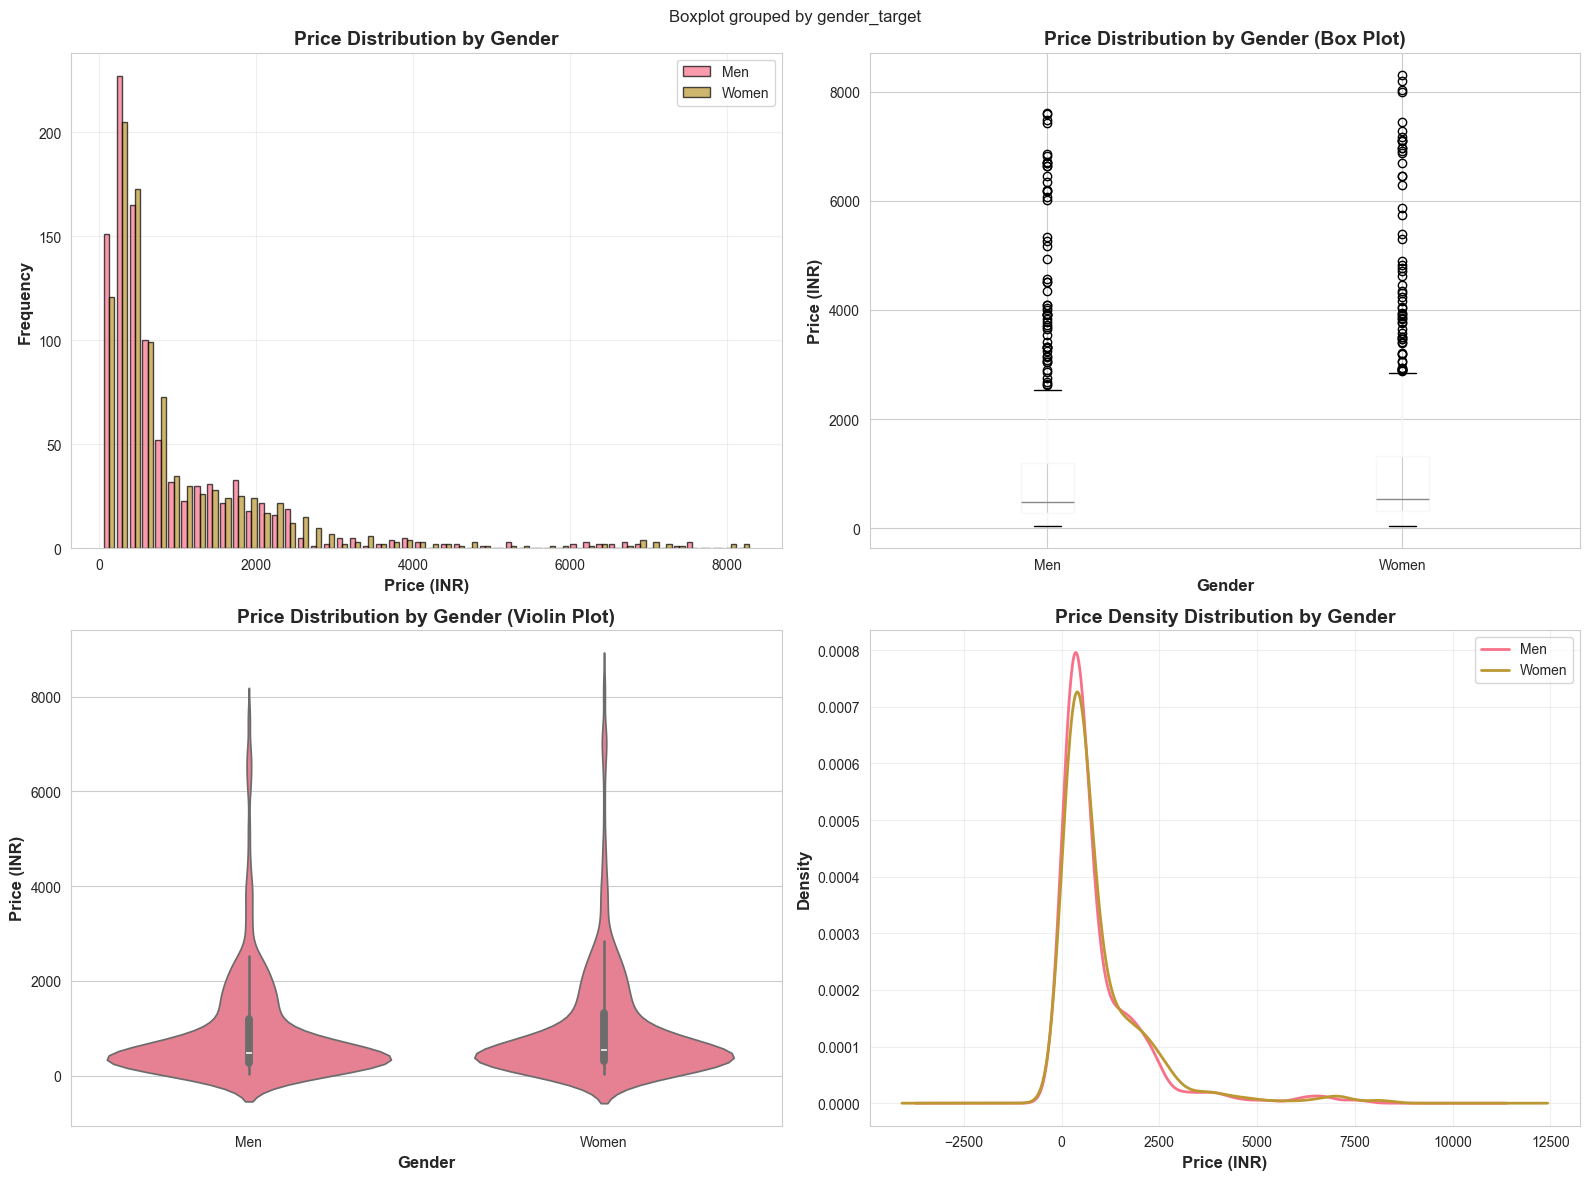

✓ Displayed: Price Distribution by Gender

Creating Plot 2: Pink Tax Overview...


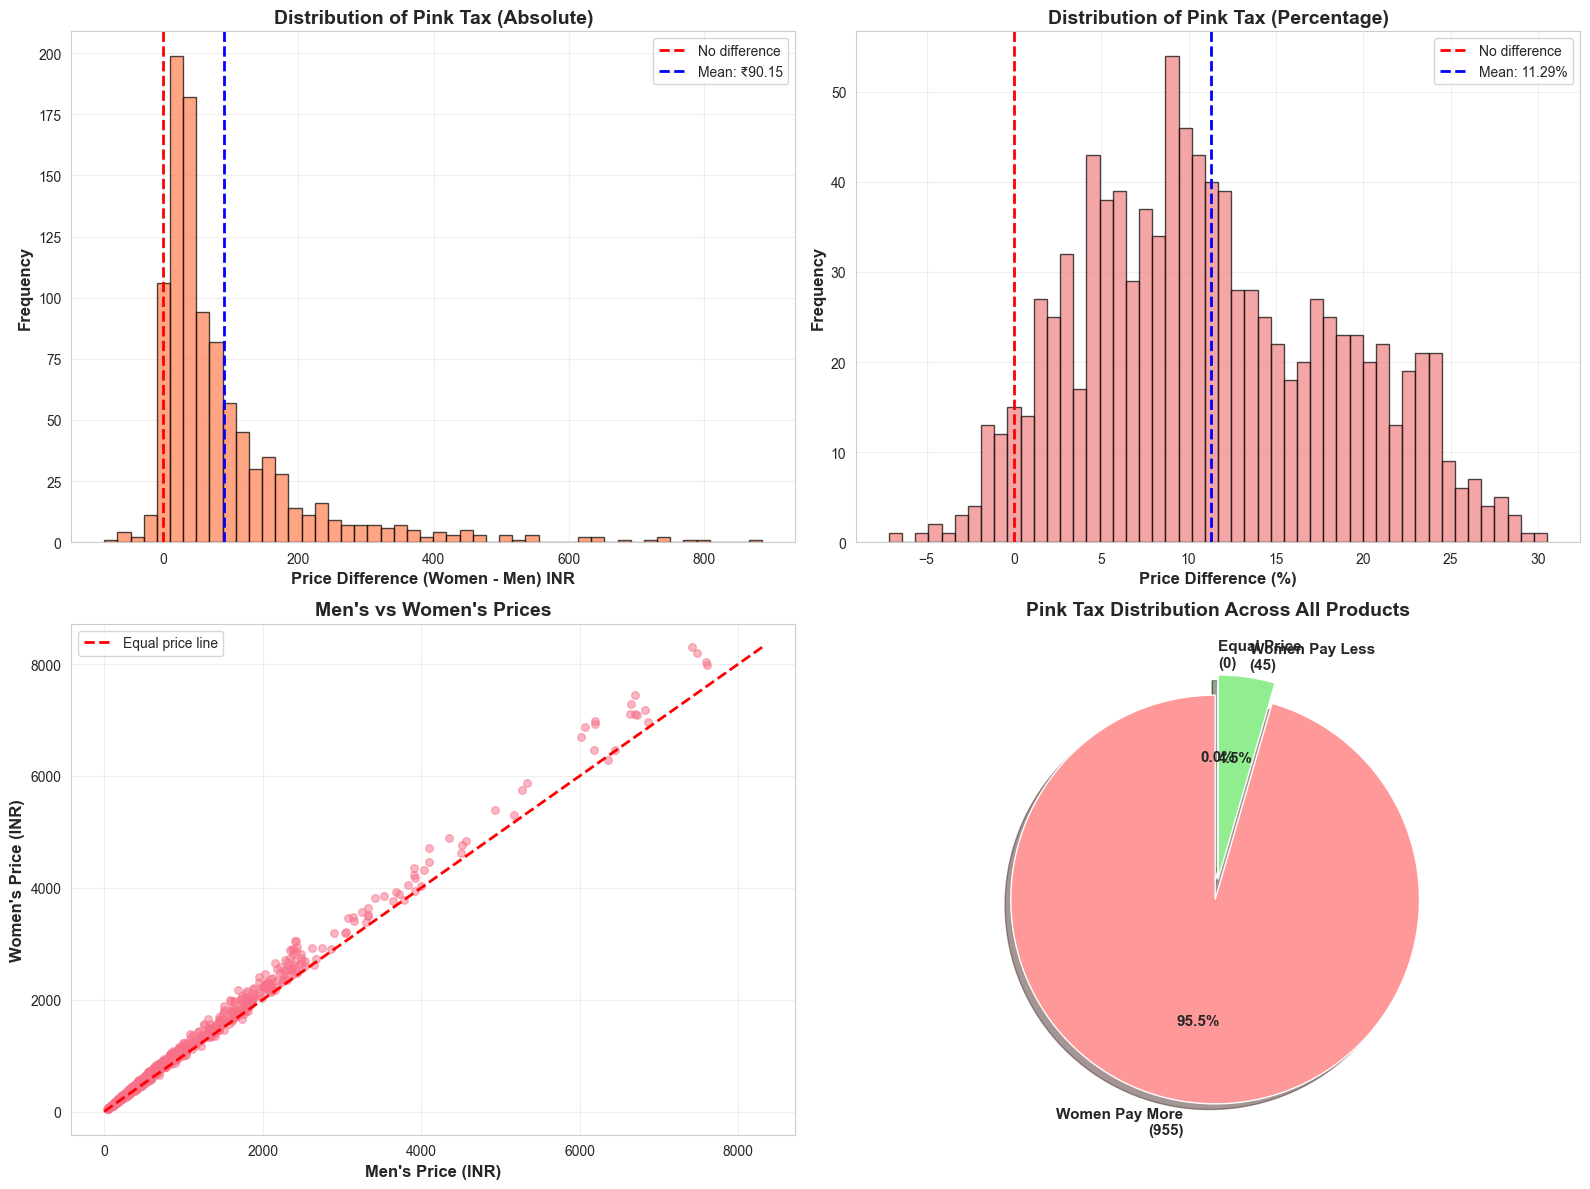

✓ Displayed: Pink Tax Overview

Creating Plot 3: Category Analysis...


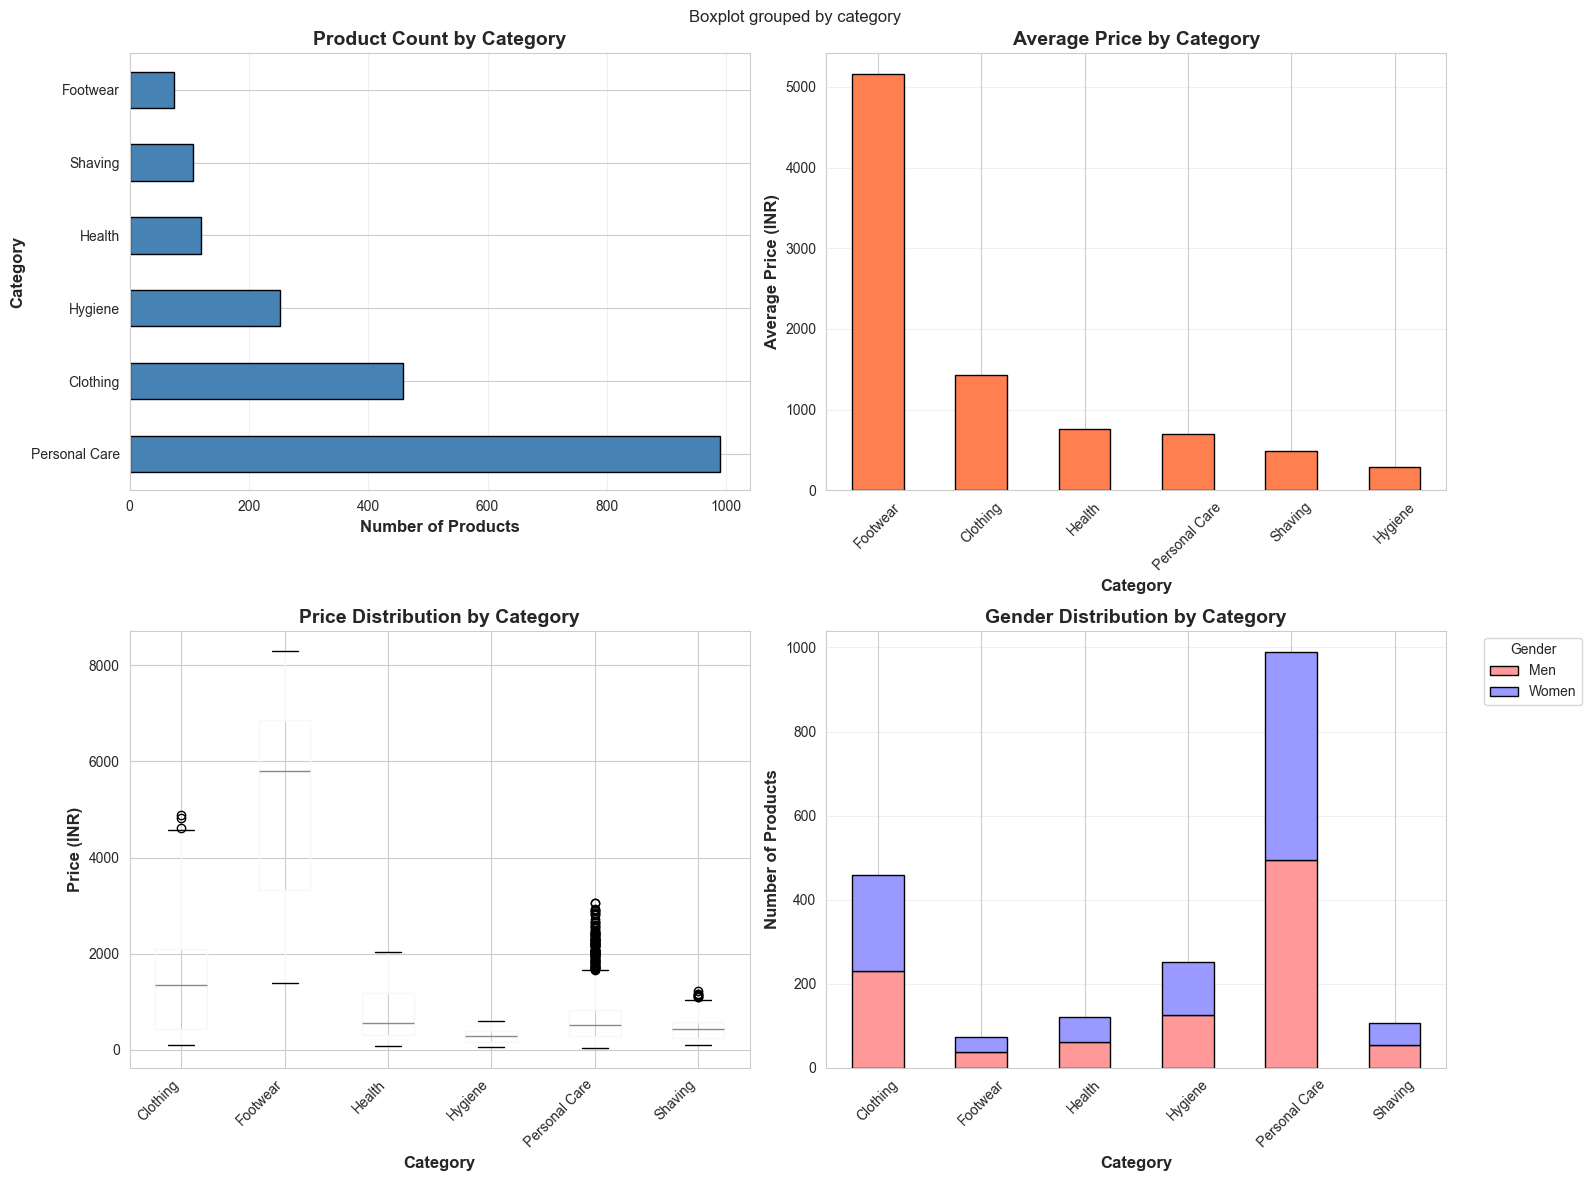

✓ Displayed: Category Analysis

Creating Plot 4: Pink Tax by Category...


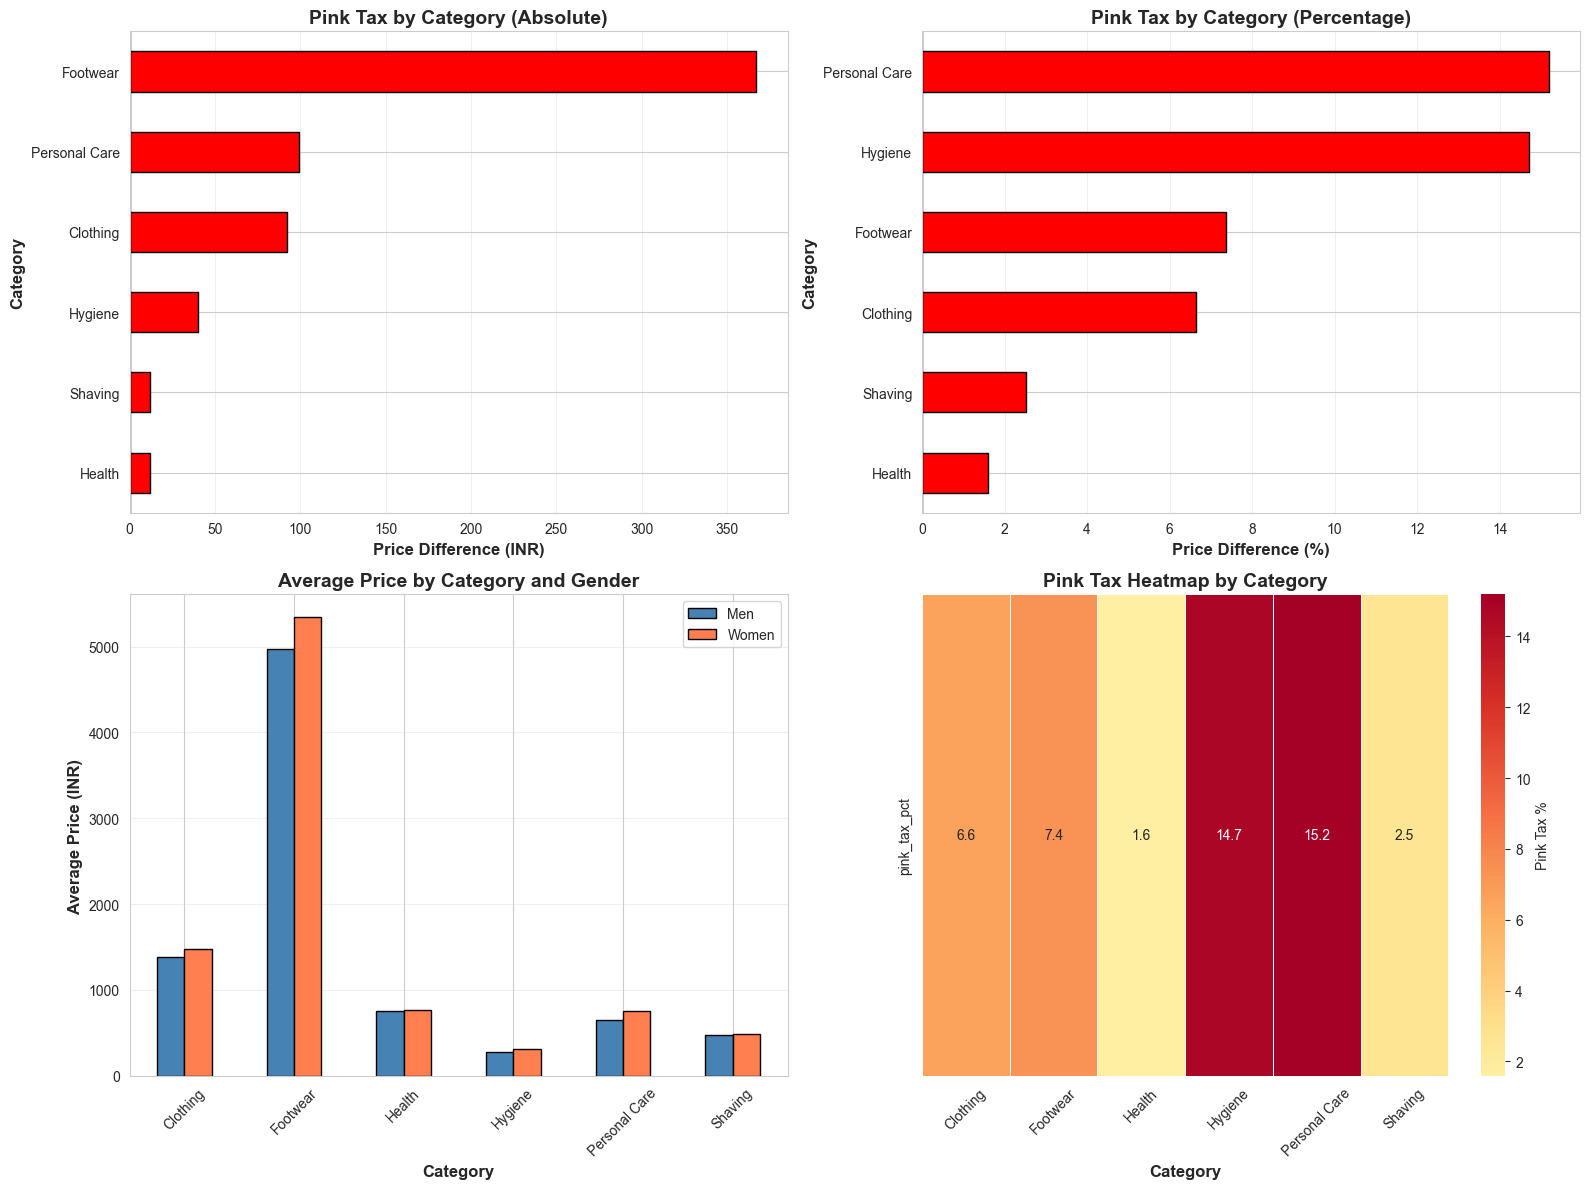

✓ Displayed: Pink Tax by Category

Creating Plot 5: Brand Analysis...


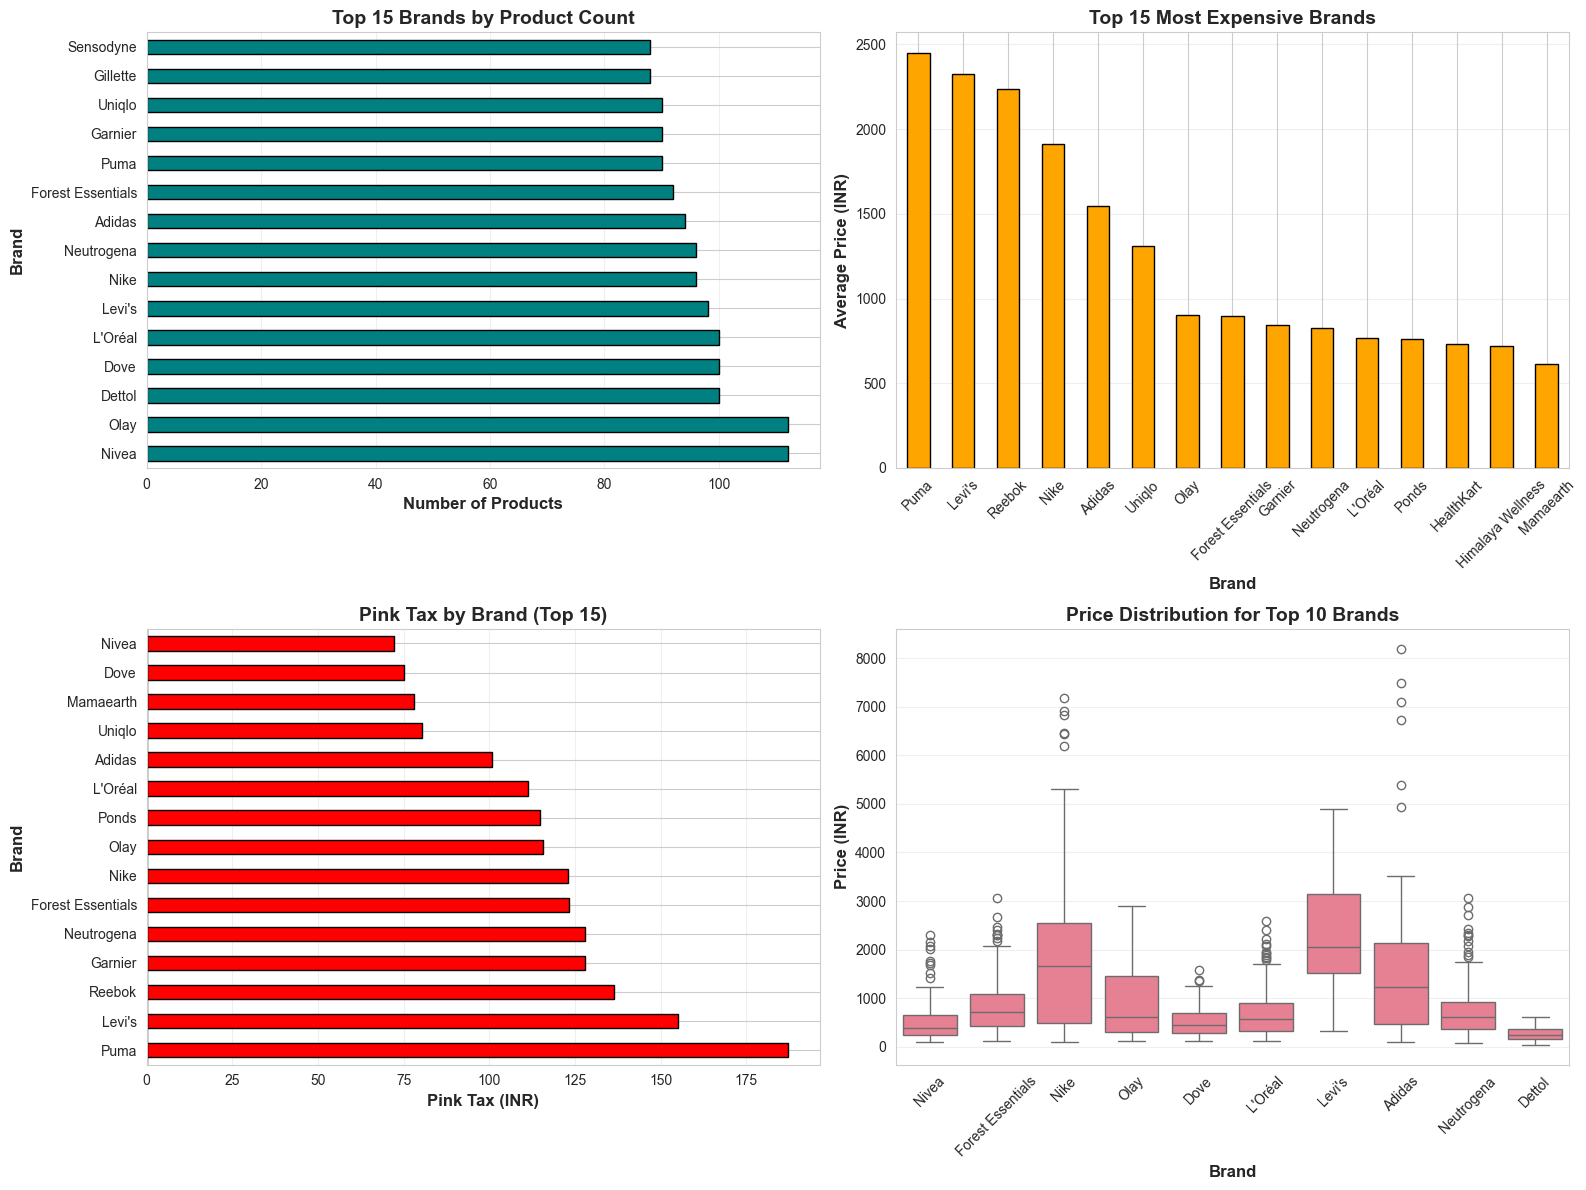

✓ Displayed: Brand Analysis

Creating Plot 6: Retailer Analysis...


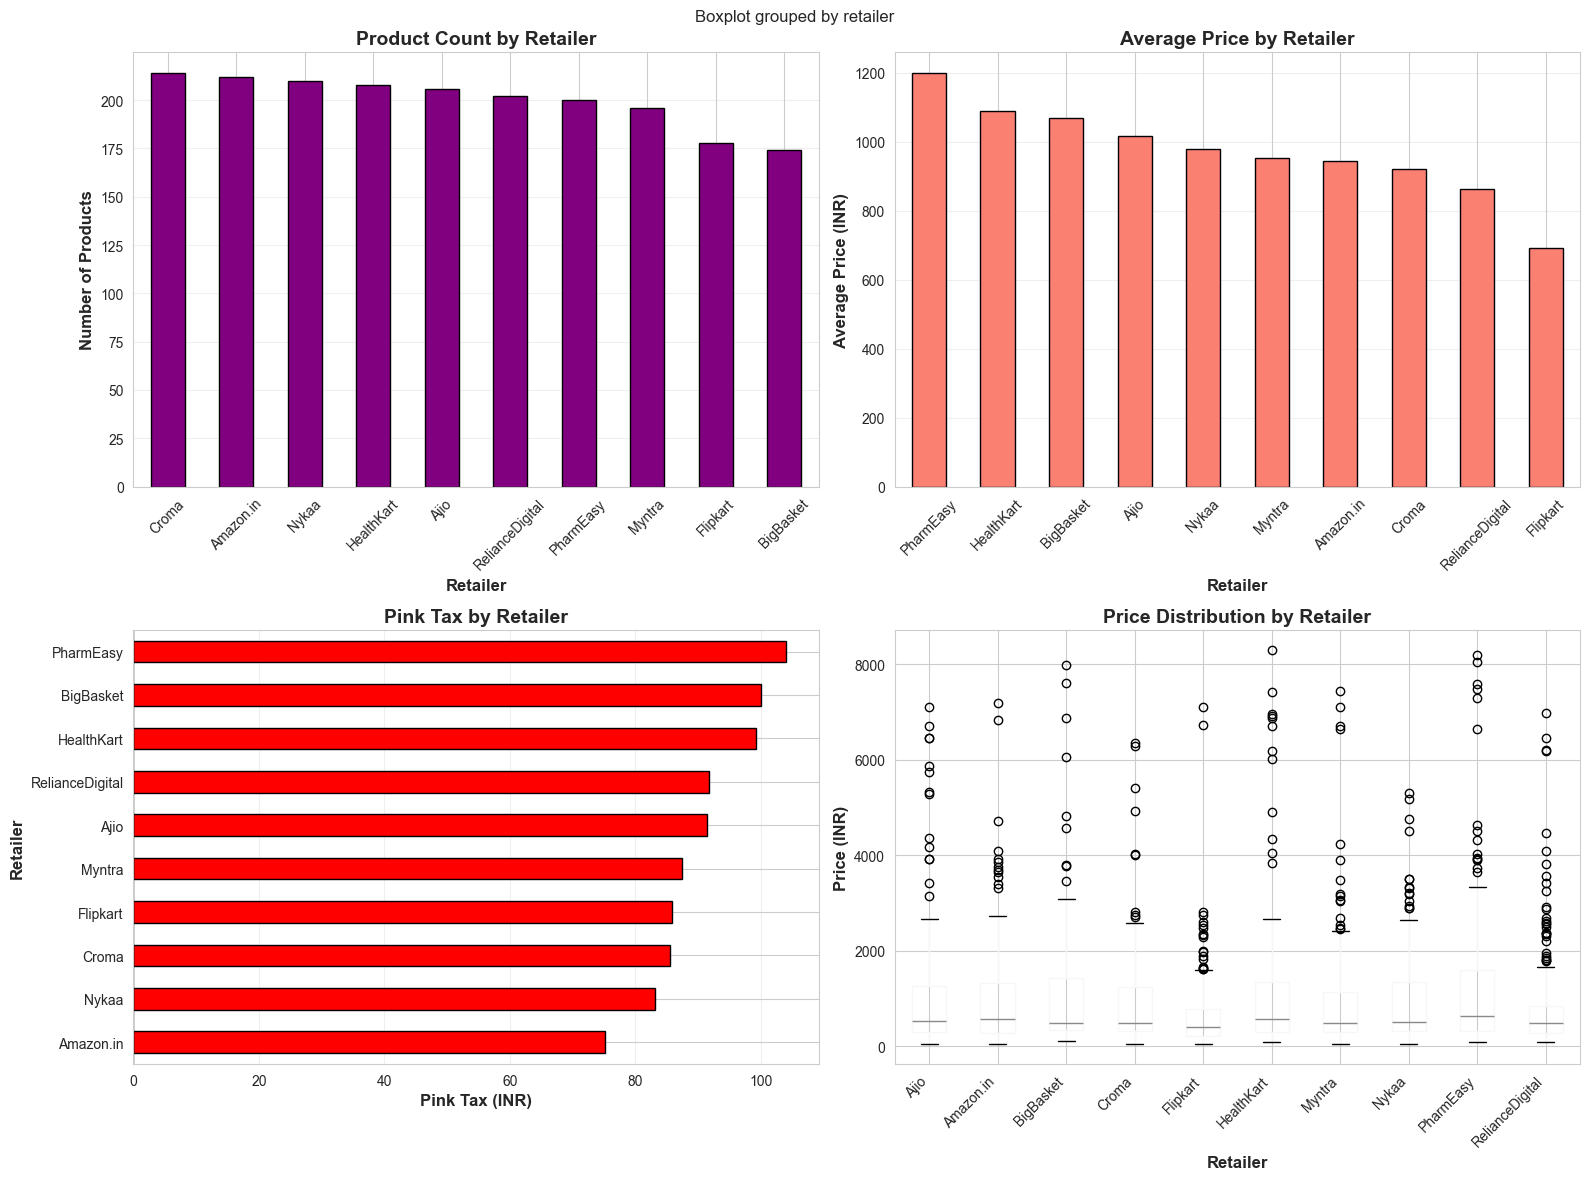

✓ Displayed: Retailer Analysis

Creating Plot 7: Subcategory Analysis...


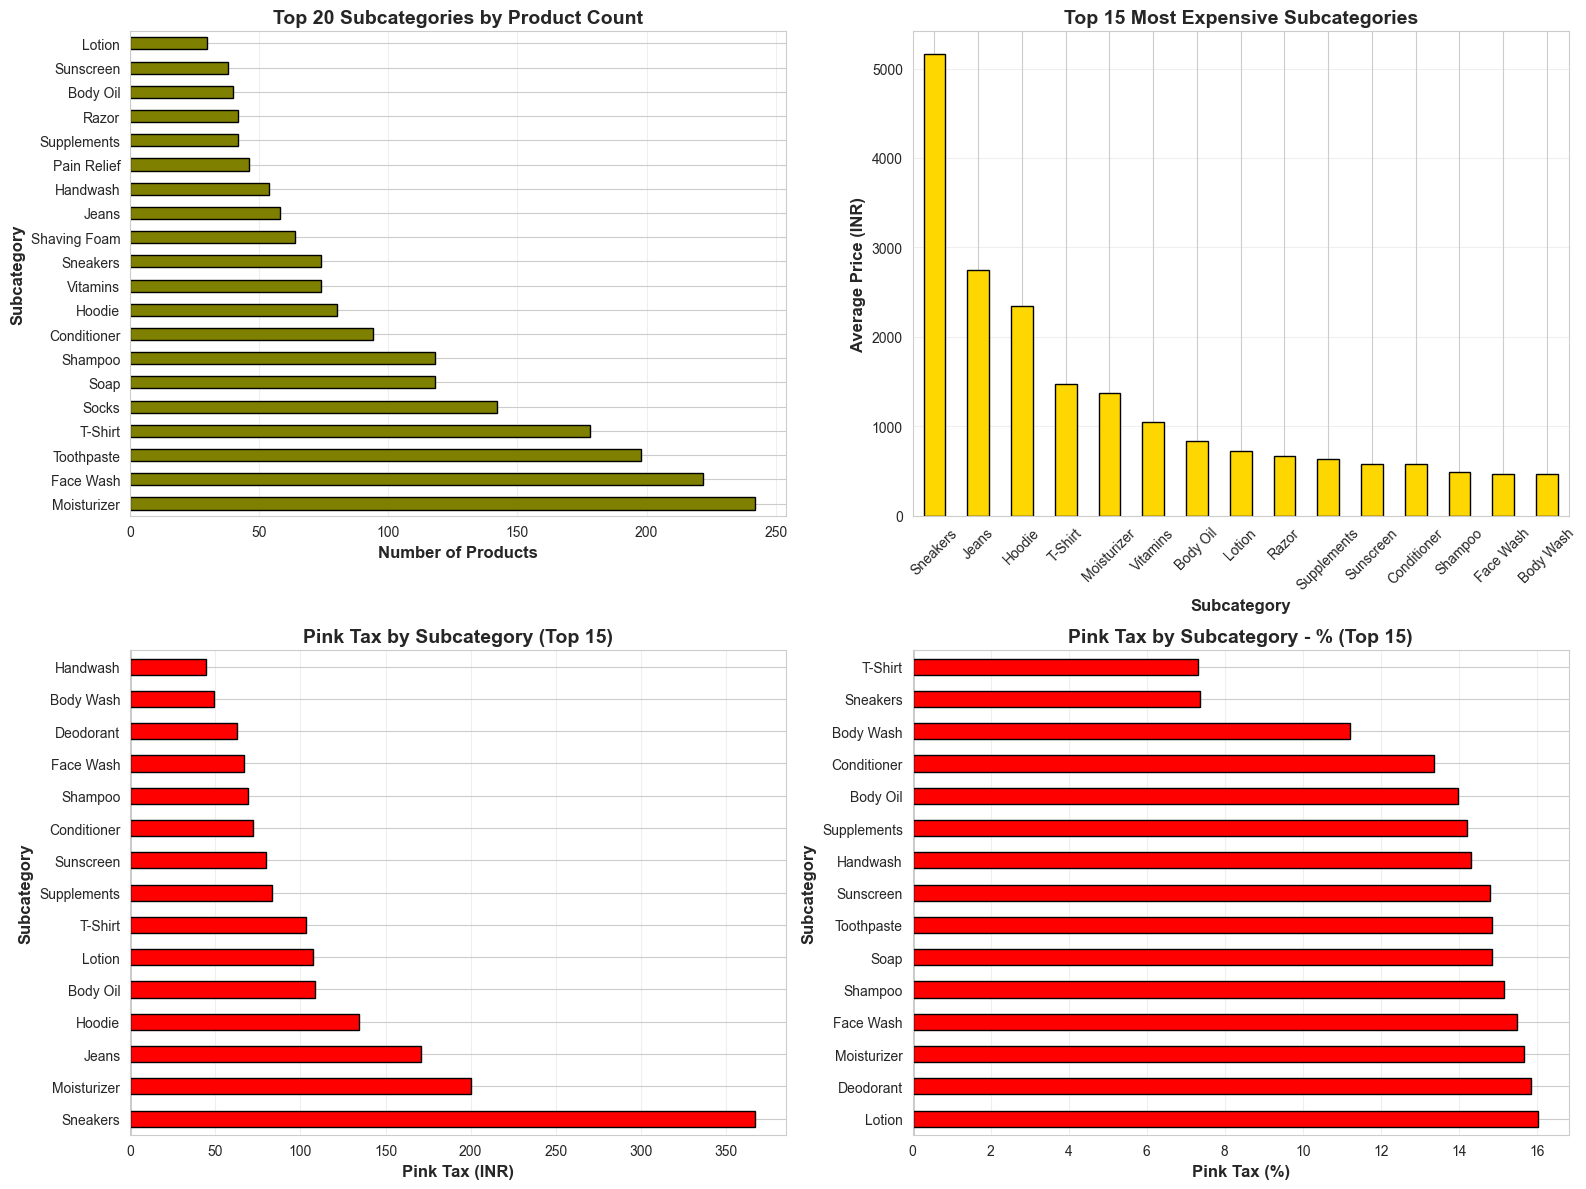

✓ Displayed: Subcategory Analysis

Creating Plot 8: Price Range Analysis...


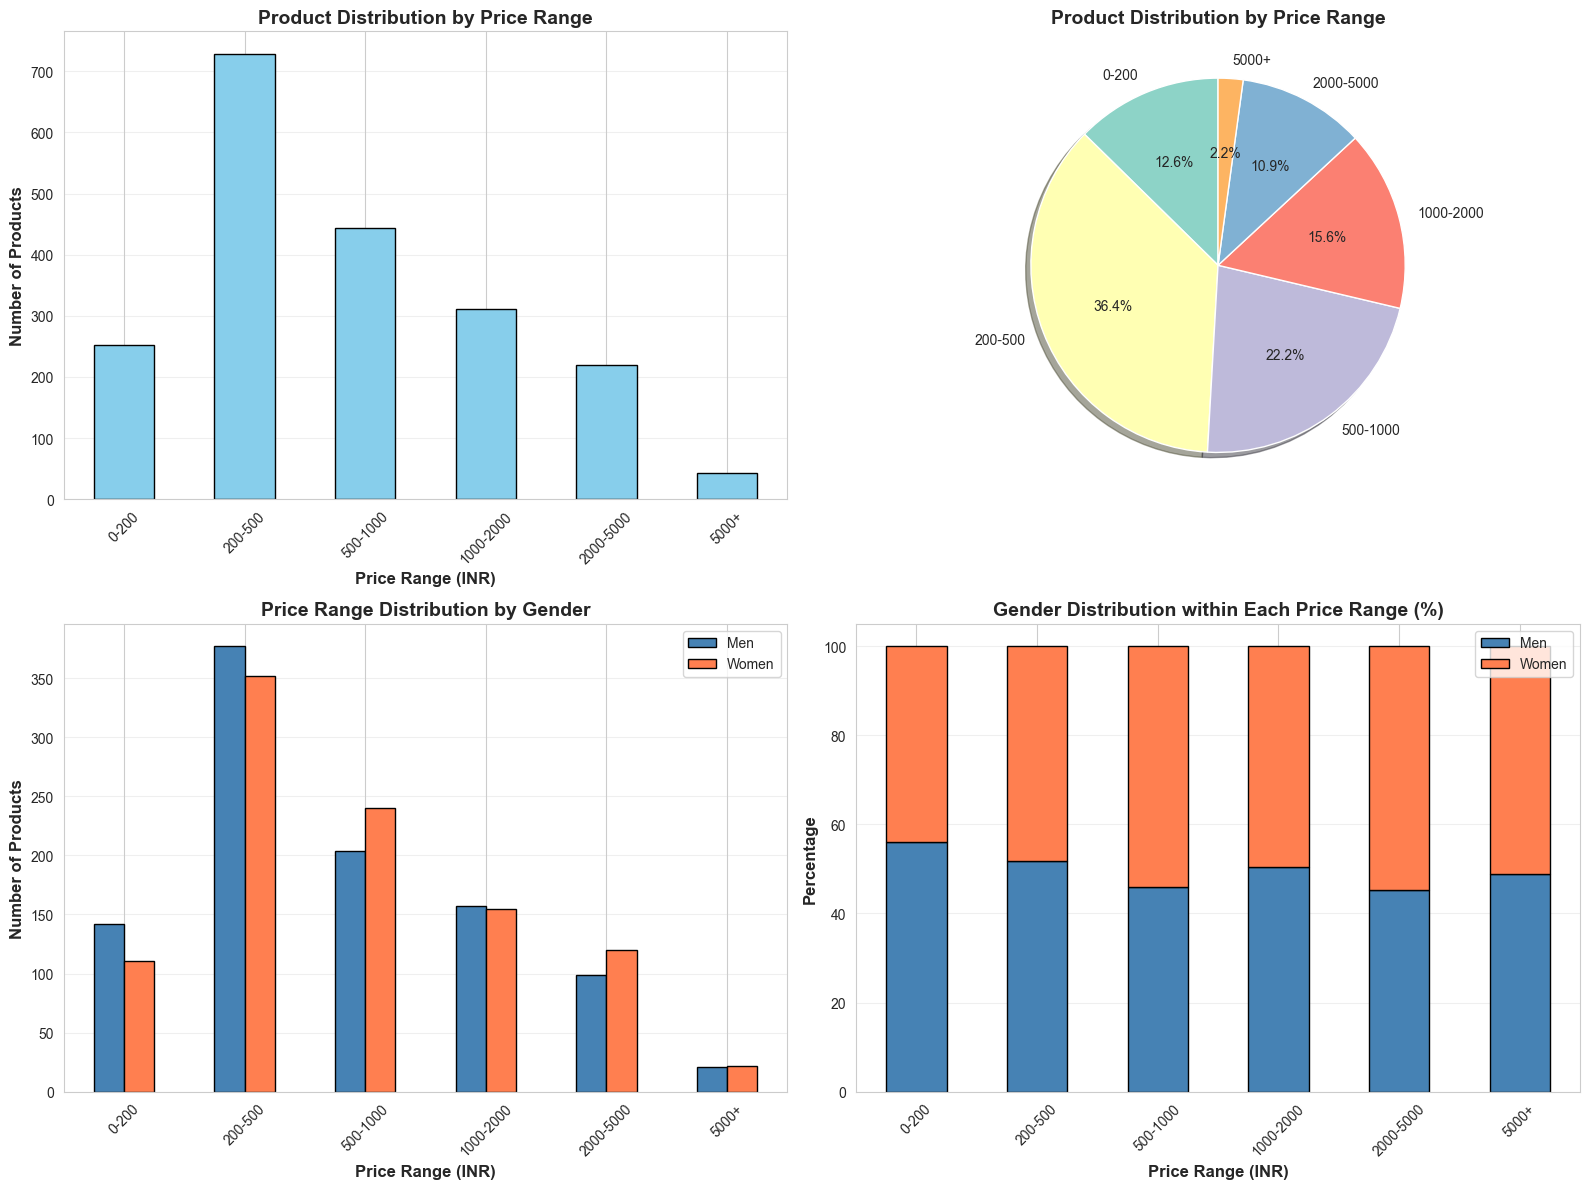

✓ Displayed: Price Range Analysis

Creating Plot 9: Correlation Heatmap...


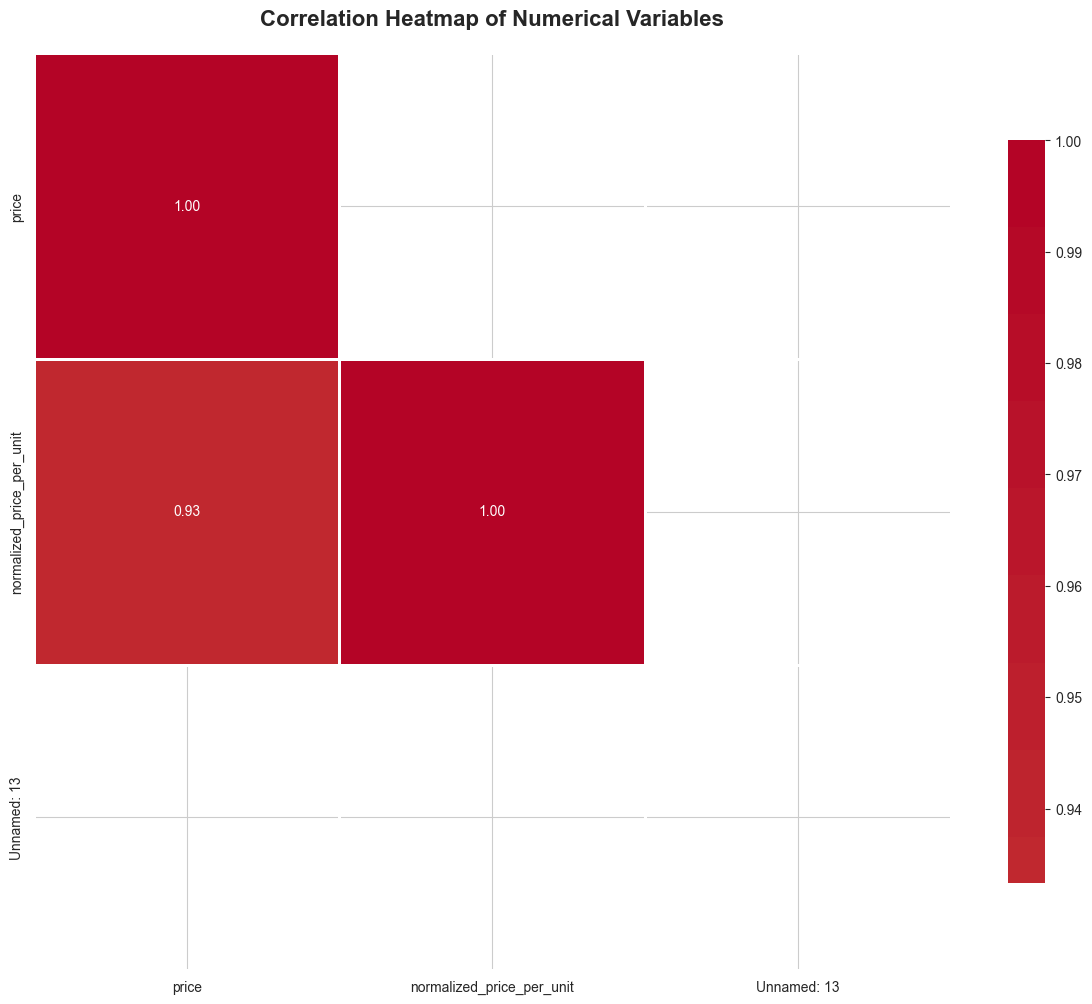

✓ Displayed: Correlation Heatmap

Creating Plot 10: Top Expensive and Cheapest Products...


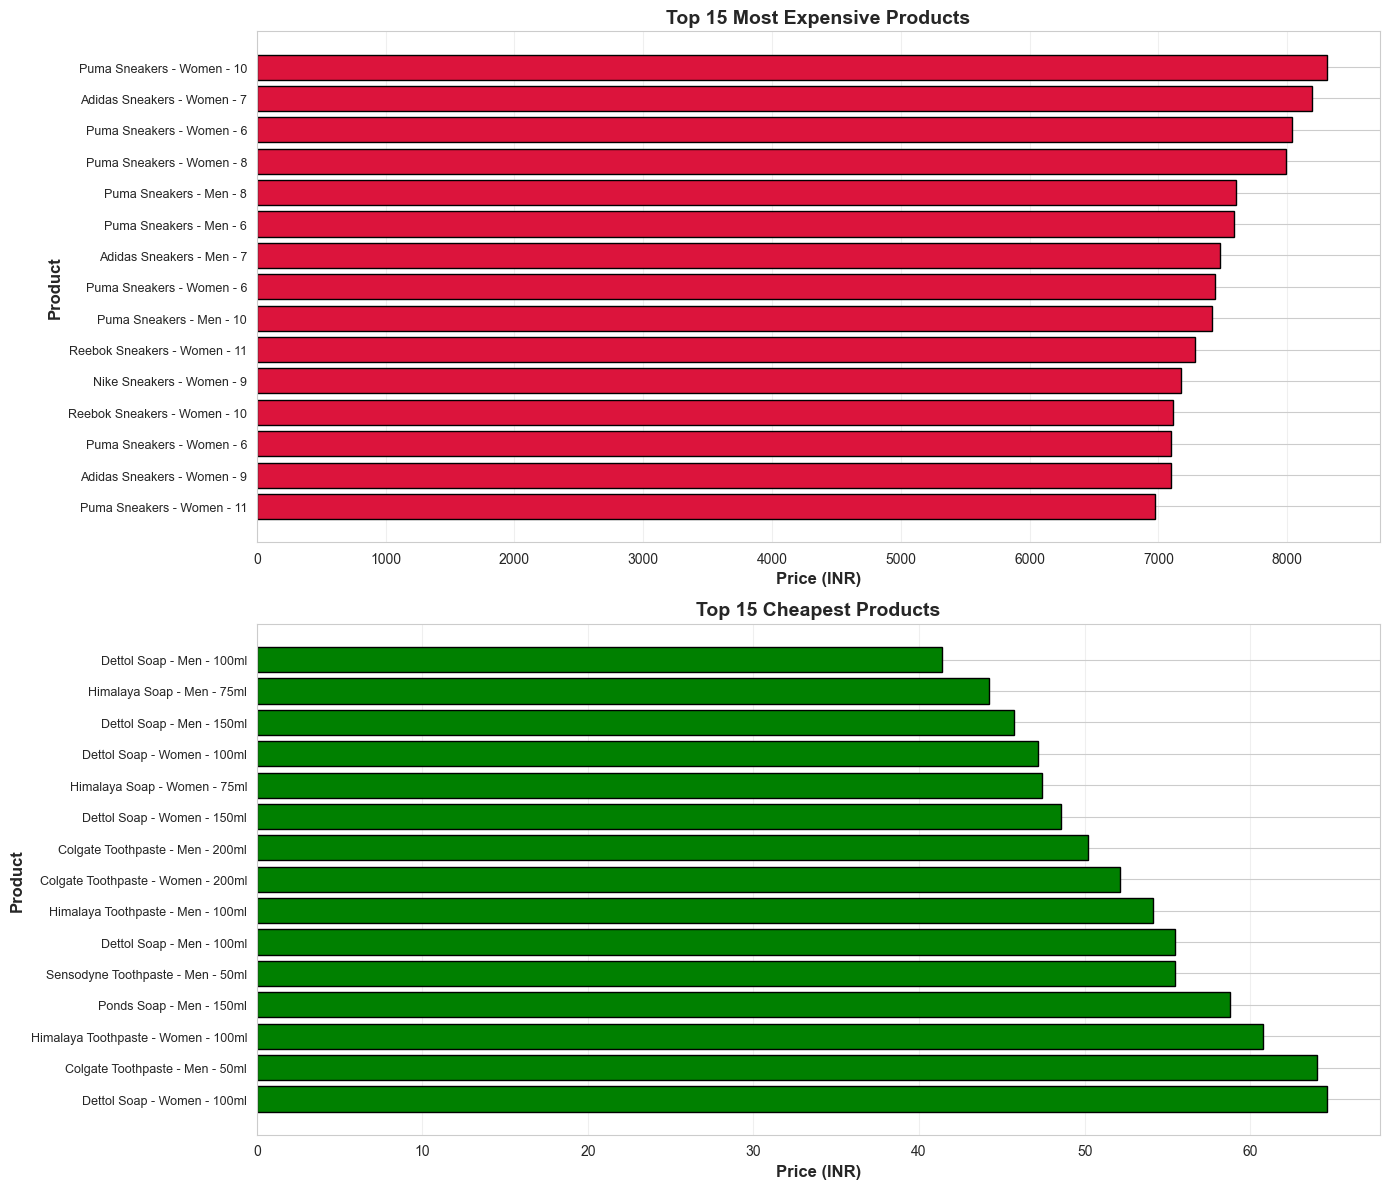

✓ Displayed: Top Products

Creating Plot 11: Normalized Price Analysis...


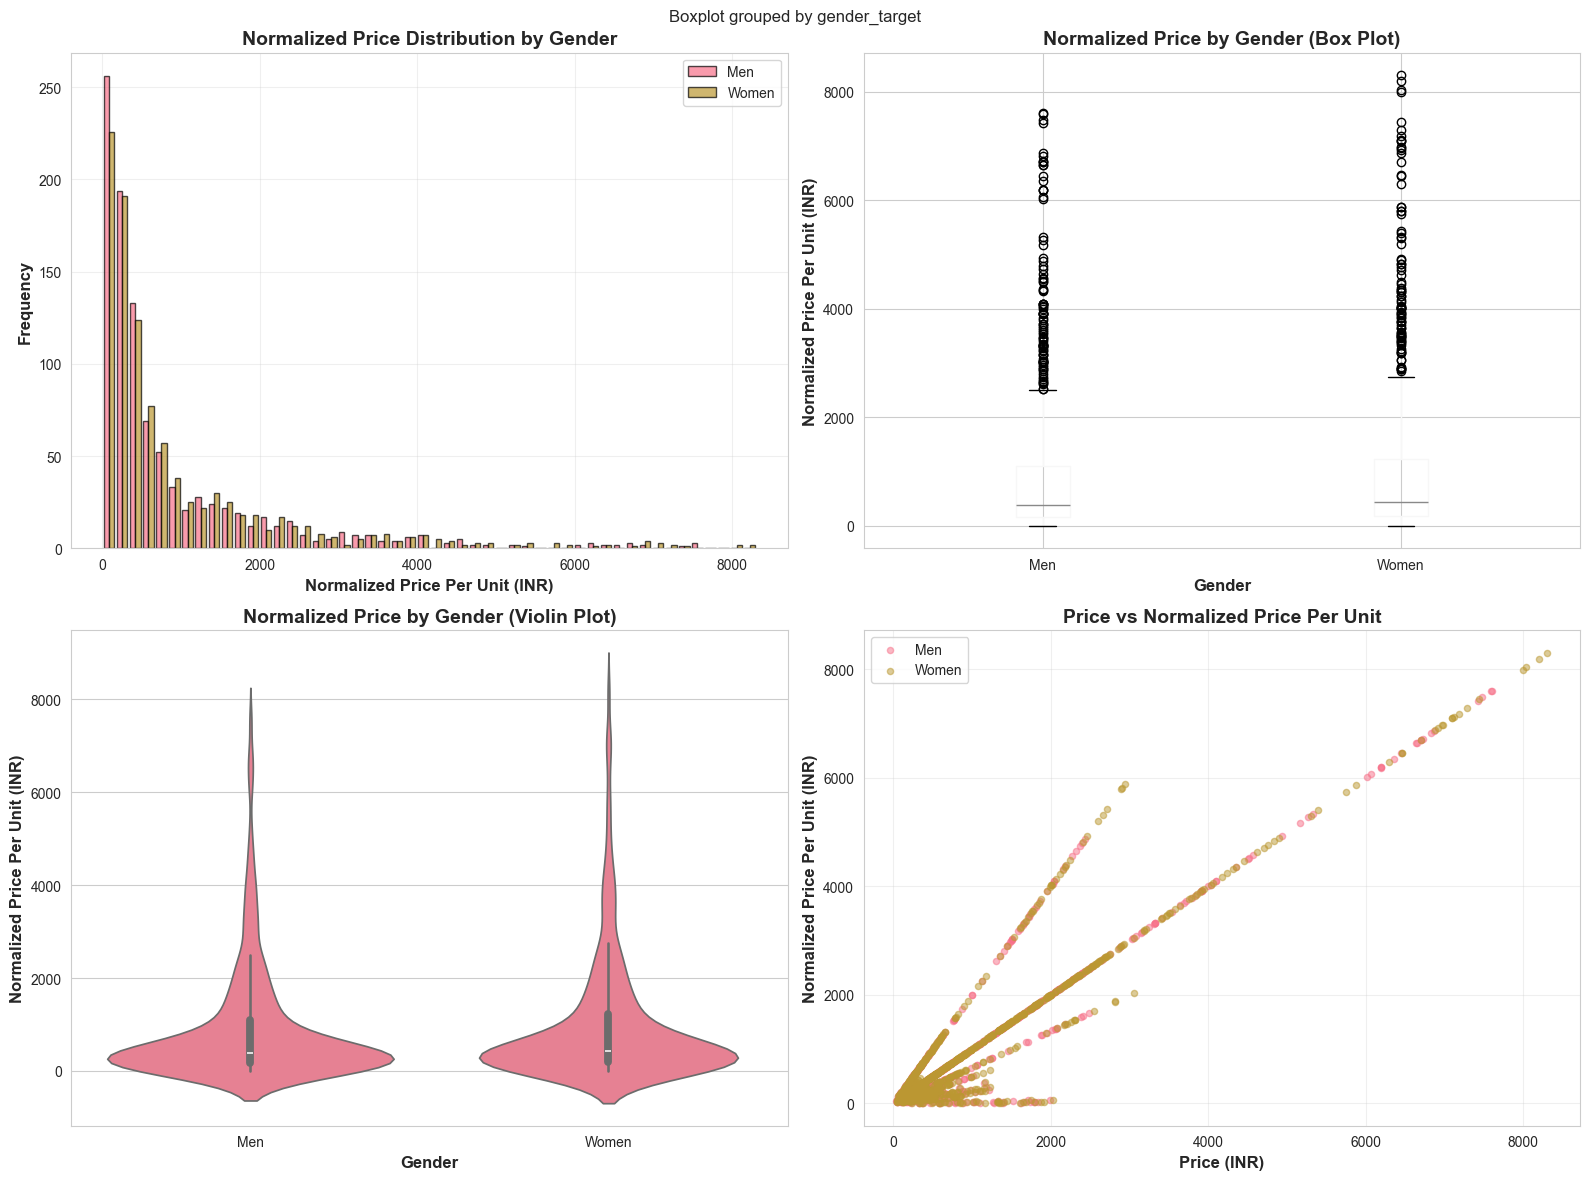

✓ Displayed: Normalized Price Analysis

Creating Plot 12: Statistical Comparison...


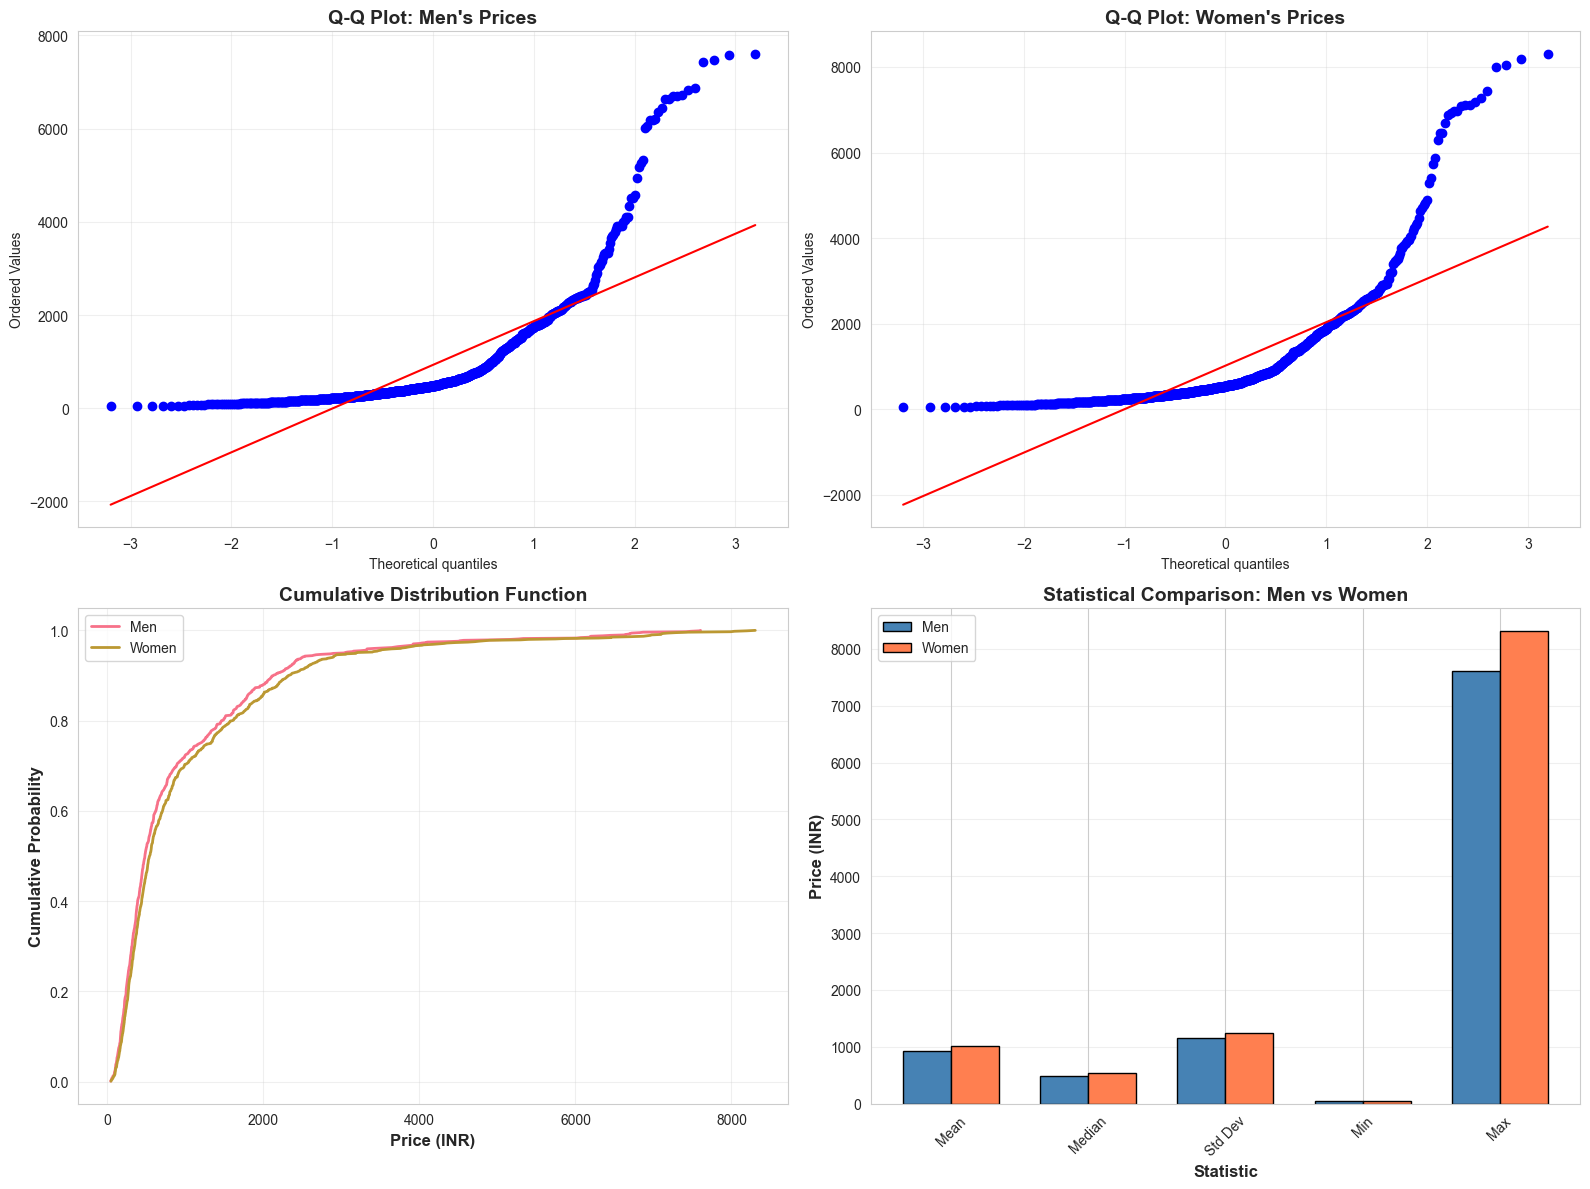

✓ Displayed: Statistical Comparison

Creating Plot 13: Size Analysis...


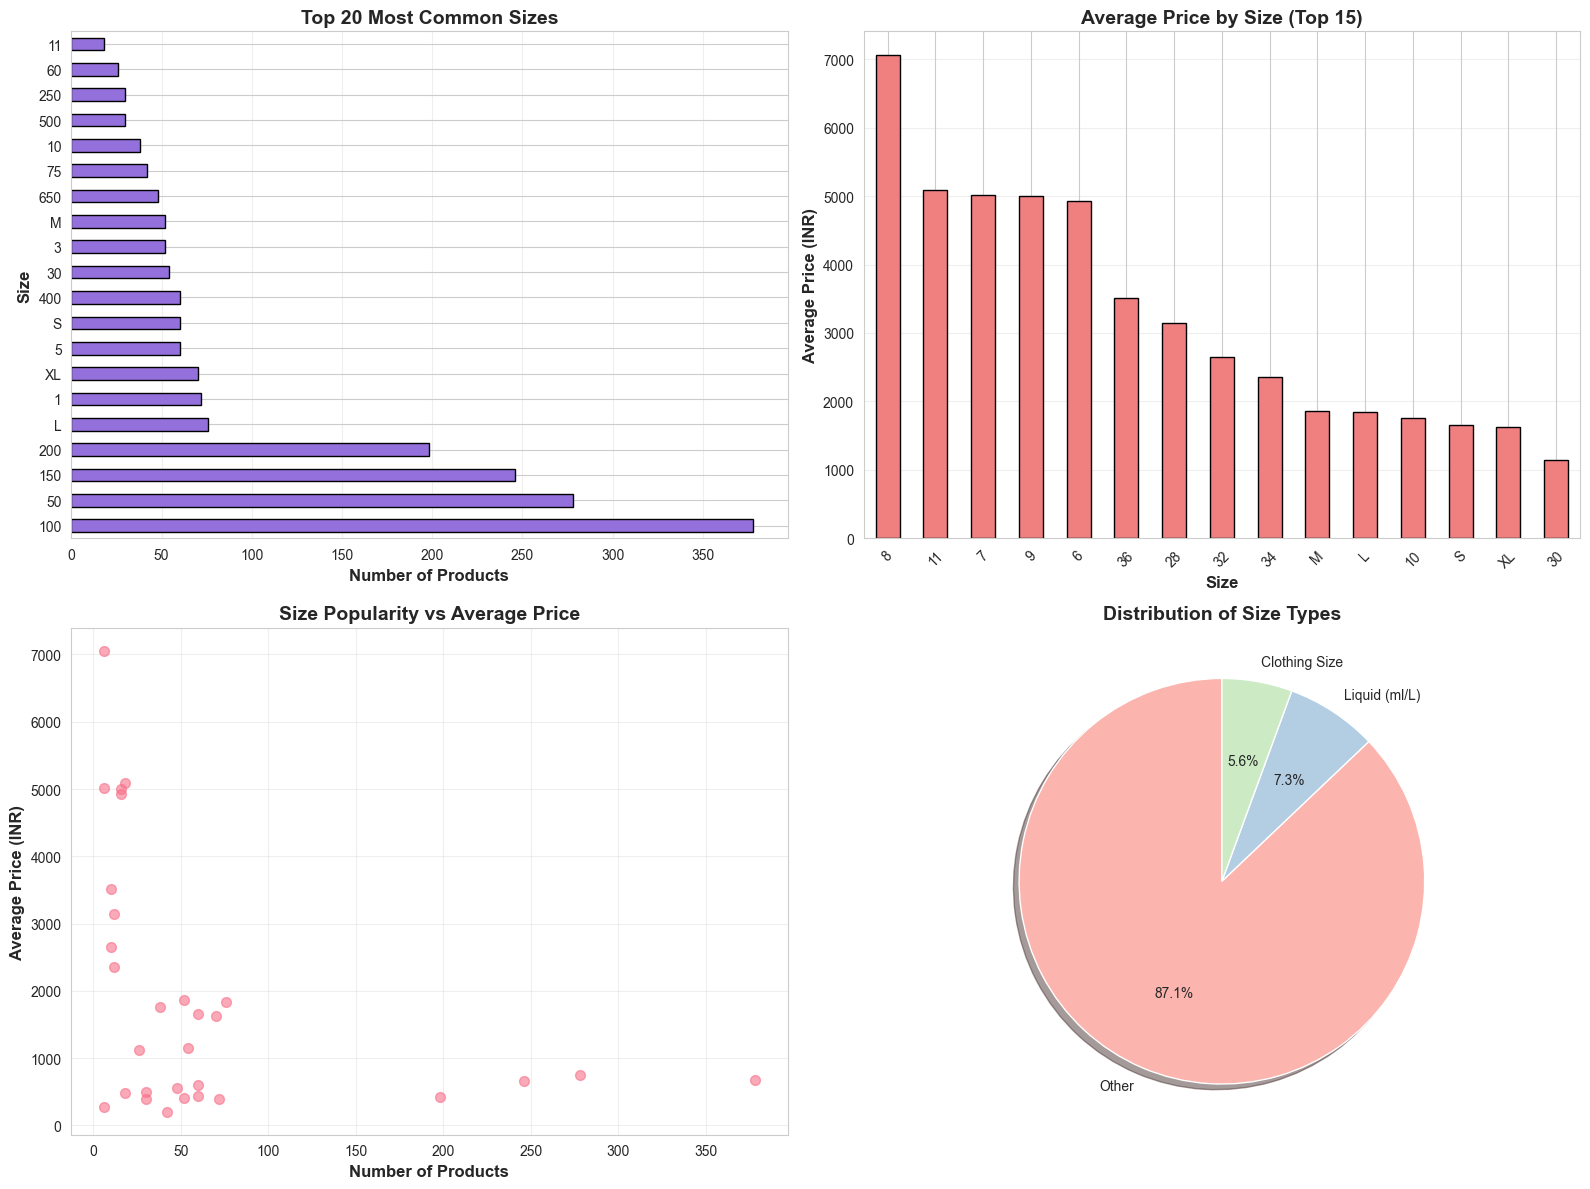

✓ Displayed: Size Analysis

Creating Plot 14: Comprehensive Dashboard...


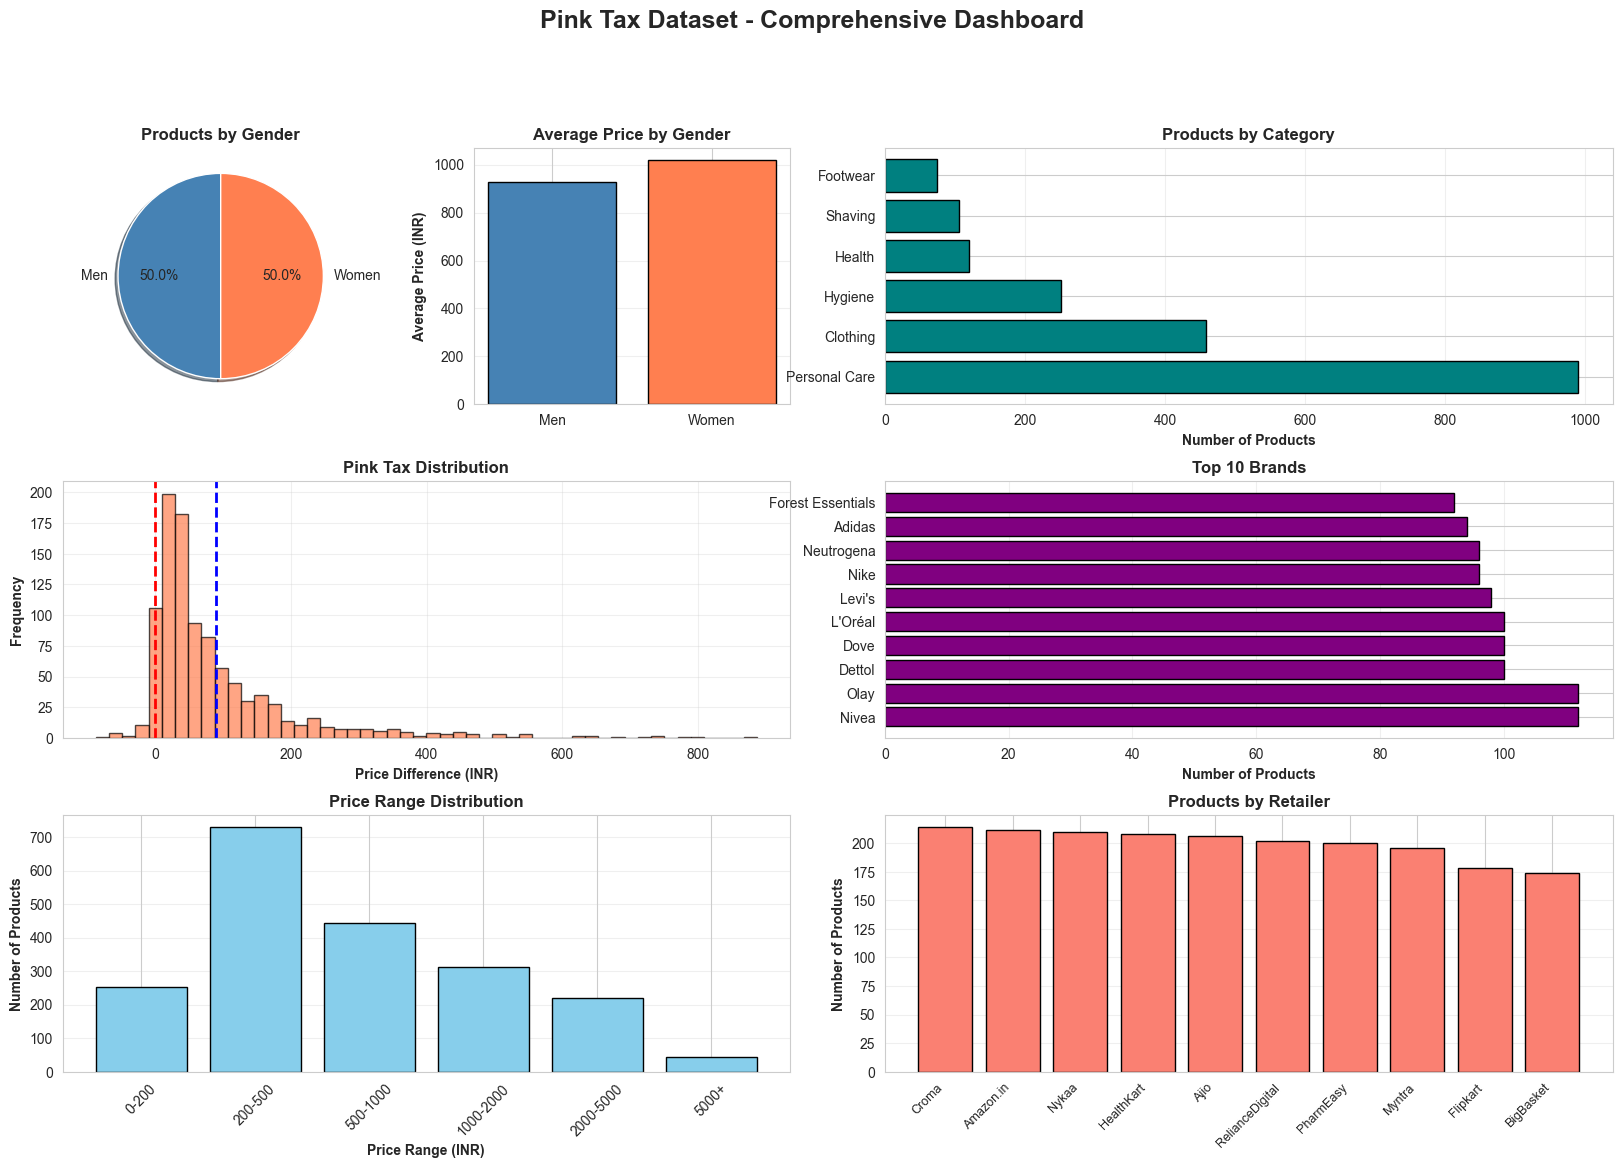

✓ Displayed: Comprehensive Dashboard

Creating Plot 15: Top Pink Tax Products...


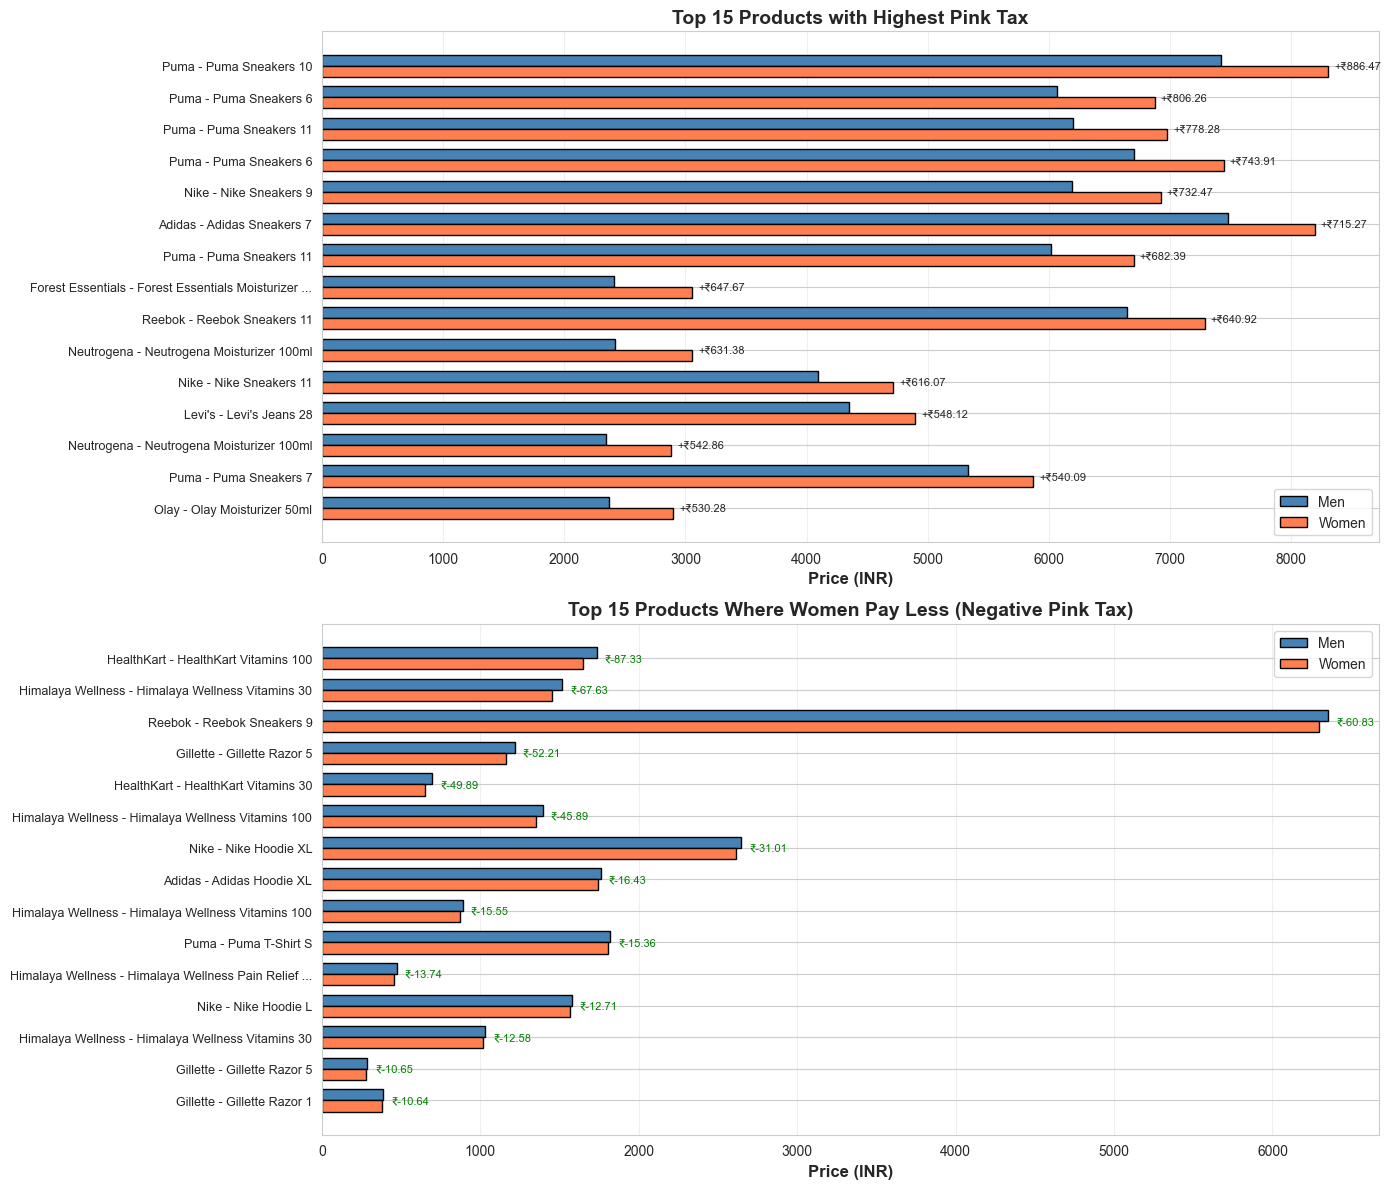

✓ Displayed: Top Pink Tax Products


✓ ALL VISUALIZATIONS DISPLAYED SUCCESSFULLY!




In [5]:
def plot_4_pink_tax_by_category(df):
    """Plot pink tax by category"""
    print("Creating Plot 4: Pink Tax by Category...")
    
    df_gender = df[df['gender_target'].isin(['Men', 'Women'])].copy()
    
    # Calculate pink tax by category
    category_gender_price = df_gender.groupby(['category', 'gender_target'])['price'].mean().unstack()
    
    if 'Men' not in category_gender_price.columns or 'Women' not in category_gender_price.columns:
        print("  Skipped: Missing gender data")
        return
    
    category_gender_price['pink_tax'] = category_gender_price['Women'] - category_gender_price['Men']
    category_gender_price['pink_tax_pct'] = (category_gender_price['pink_tax'] / category_gender_price['Men']) * 100
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Absolute pink tax by category
    pink_tax_sorted = category_gender_price.sort_values('pink_tax', ascending=True)
    colors = ['green' if x < 0 else 'red' for x in pink_tax_sorted['pink_tax']]
    pink_tax_sorted['pink_tax'].plot(kind='barh', ax=axes[0, 0], color=colors, edgecolor='black')
    axes[0, 0].axvline(x=0, color='black', linestyle='-', linewidth=1)
    axes[0, 0].set_xlabel('Price Difference (INR)', fontsize=12, fontweight='bold')
    axes[0, 0].set_ylabel('Category', fontsize=12, fontweight='bold')
    axes[0, 0].set_title('Pink Tax by Category (Absolute)', fontsize=14, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3, axis='x')
    
    # Percentage pink tax by category
    pink_tax_pct_sorted = category_gender_price.sort_values('pink_tax_pct', ascending=True)
    colors_pct = ['green' if x < 0 else 'red' for x in pink_tax_pct_sorted['pink_tax_pct']]
    pink_tax_pct_sorted['pink_tax_pct'].plot(kind='barh', ax=axes[0, 1], color=colors_pct, edgecolor='black')
    axes[0, 1].axvline(x=0, color='black', linestyle='-', linewidth=1)
    axes[0, 1].set_xlabel('Price Difference (%)', fontsize=12, fontweight='bold')
    axes[0, 1].set_ylabel('Category', fontsize=12, fontweight='bold')
    axes[0, 1].set_title('Pink Tax by Category (Percentage)', fontsize=14, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3, axis='x')
    
    # Grouped bar chart - Men vs Women prices by category
    category_gender_price[['Men', 'Women']].plot(kind='bar', ax=axes[1, 0], 
                                                   color=['steelblue', 'coral'], edgecolor='black')
    axes[1, 0].set_xlabel('Category', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Average Price (INR)', fontsize=12, fontweight='bold')
    axes[1, 0].set_title('Average Price by Category and Gender', fontsize=14, fontweight='bold')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].legend(['Men', 'Women'])
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    # Heatmap of pink tax percentage
    heatmap_data = category_gender_price[['pink_tax_pct']].T
    sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='RdYlGn_r', center=0,
                cbar_kws={'label': 'Pink Tax %'}, ax=axes[1, 1], linewidths=0.5)
    axes[1, 1].set_xlabel('Category', fontsize=12, fontweight='bold')
    axes[1, 1].set_ylabel('', fontsize=12, fontweight='bold')
    axes[1, 1].set_title('Pink Tax Heatmap by Category', fontsize=14, fontweight='bold')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    print("✓ Displayed: Pink Tax by Category\n")

def plot_5_brand_analysis(df):
    """Plot brand analysis"""
    print("Creating Plot 5: Brand Analysis...")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Top 15 brands by product count
    top_brands = df['brand'].value_counts().head(15)
    top_brands.plot(kind='barh', ax=axes[0, 0], color='teal', edgecolor='black')
    axes[0, 0].set_xlabel('Number of Products', fontsize=12, fontweight='bold')
    axes[0, 0].set_ylabel('Brand', fontsize=12, fontweight='bold')
    axes[0, 0].set_title('Top 15 Brands by Product Count', fontsize=14, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3, axis='x')
    
    # Top 15 brands by average price
    brand_price = df.groupby('brand')['price'].mean().sort_values(ascending=False).head(15)
    brand_price.plot(kind='bar', ax=axes[0, 1], color='orange', edgecolor='black')
    axes[0, 1].set_xlabel('Brand', fontsize=12, fontweight='bold')
    axes[0, 1].set_ylabel('Average Price (INR)', fontsize=12, fontweight='bold')
    axes[0, 1].set_title('Top 15 Most Expensive Brands', fontsize=14, fontweight='bold')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(True, alpha=0.3, axis='y')
    
    # Pink tax by brand (top 15)
    df_gender = df[df['gender_target'].isin(['Men', 'Women'])].copy()
    brand_gender_price = df_gender.groupby(['brand', 'gender_target'])['price'].mean().unstack()
    
    if 'Men' in brand_gender_price.columns and 'Women' in brand_gender_price.columns:
        brand_gender_price['pink_tax'] = brand_gender_price['Women'] - brand_gender_price['Men']
        brand_gender_price['pink_tax_pct'] = (brand_gender_price['pink_tax'] / brand_gender_price['Men']) * 100
        
        top_pink_tax_brands = brand_gender_price.sort_values('pink_tax', ascending=False).head(15)
        colors_brand = ['green' if x < 0 else 'red' for x in top_pink_tax_brands['pink_tax']]
        top_pink_tax_brands['pink_tax'].plot(kind='barh', ax=axes[1, 0], color=colors_brand, edgecolor='black')
        axes[1, 0].axvline(x=0, color='black', linestyle='-', linewidth=1)
        axes[1, 0].set_xlabel('Pink Tax (INR)', fontsize=12, fontweight='bold')
        axes[1, 0].set_ylabel('Brand', fontsize=12, fontweight='bold')
        axes[1, 0].set_title('Pink Tax by Brand (Top 15)', fontsize=14, fontweight='bold')
        axes[1, 0].grid(True, alpha=0.3, axis='x')
    
    # Brand price distribution (top 10 brands)
    top_10_brands = df['brand'].value_counts().head(10).index
    df_top_brands = df[df['brand'].isin(top_10_brands)]
    
    sns.boxplot(data=df_top_brands, x='brand', y='price', ax=axes[1, 1])
    axes[1, 1].set_xlabel('Brand', fontsize=12, fontweight='bold')
    axes[1, 1].set_ylabel('Price (INR)', fontsize=12, fontweight='bold')
    axes[1, 1].set_title('Price Distribution for Top 10 Brands', fontsize=14, fontweight='bold')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    print("✓ Displayed: Brand Analysis\n")

def plot_6_retailer_analysis(df):
    """Plot retailer analysis"""
    print("Creating Plot 6: Retailer Analysis...")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Product count by retailer
    retailer_counts = df['retailer'].value_counts()
    retailer_counts.plot(kind='bar', ax=axes[0, 0], color='purple', edgecolor='black')
    axes[0, 0].set_xlabel('Retailer', fontsize=12, fontweight='bold')
    axes[0, 0].set_ylabel('Number of Products', fontsize=12, fontweight='bold')
    axes[0, 0].set_title('Product Count by Retailer', fontsize=14, fontweight='bold')
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(True, alpha=0.3, axis='y')
    
    # Average price by retailer
    retailer_price = df.groupby('retailer')['price'].mean().sort_values(ascending=False)
    retailer_price.plot(kind='bar', ax=axes[0, 1], color='salmon', edgecolor='black')
    axes[0, 1].set_xlabel('Retailer', fontsize=12, fontweight='bold')
    axes[0, 1].set_ylabel('Average Price (INR)', fontsize=12, fontweight='bold')
    axes[0, 1].set_title('Average Price by Retailer', fontsize=14, fontweight='bold')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(True, alpha=0.3, axis='y')
    
    # Pink tax by retailer
    df_gender = df[df['gender_target'].isin(['Men', 'Women'])].copy()
    retailer_gender_price = df_gender.groupby(['retailer', 'gender_target'])['price'].mean().unstack()
    
    if 'Men' in retailer_gender_price.columns and 'Women' in retailer_gender_price.columns:
        retailer_gender_price['pink_tax'] = retailer_gender_price['Women'] - retailer_gender_price['Men']
        retailer_gender_price['pink_tax_pct'] = (retailer_gender_price['pink_tax'] / retailer_gender_price['Men']) * 100
        
        colors_retailer = ['green' if x < 0 else 'red' for x in retailer_gender_price['pink_tax']]
        retailer_gender_price['pink_tax'].sort_values(ascending=True).plot(kind='barh', ax=axes[1, 0], 
                                                                             color=colors_retailer, edgecolor='black')
        axes[1, 0].axvline(x=0, color='black', linestyle='-', linewidth=1)
        axes[1, 0].set_xlabel('Pink Tax (INR)', fontsize=12, fontweight='bold')
        axes[1, 0].set_ylabel('Retailer', fontsize=12, fontweight='bold')
        axes[1, 0].set_title('Pink Tax by Retailer', fontsize=14, fontweight='bold')
        axes[1, 0].grid(True, alpha=0.3, axis='x')
    
    # Box plot of prices by retailer
    df.boxplot(column='price', by='retailer', ax=axes[1, 1], rot=45)
    axes[1, 1].set_xlabel('Retailer', fontsize=12, fontweight='bold')
    axes[1, 1].set_ylabel('Price (INR)', fontsize=12, fontweight='bold')
    axes[1, 1].set_title('Price Distribution by Retailer', fontsize=14, fontweight='bold')
    plt.sca(axes[1, 1])
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    print("✓ Displayed: Retailer Analysis\n")

def plot_7_subcategory_analysis(df):
    """Plot subcategory analysis"""
    print("Creating Plot 7: Subcategory Analysis...")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Top 20 subcategories by product count
    top_subcategories = df['subcategory'].value_counts().head(20)
    top_subcategories.plot(kind='barh', ax=axes[0, 0], color='olive', edgecolor='black')
    axes[0, 0].set_xlabel('Number of Products', fontsize=12, fontweight='bold')
    axes[0, 0].set_ylabel('Subcategory', fontsize=12, fontweight='bold')
    axes[0, 0].set_title('Top 20 Subcategories by Product Count', fontsize=14, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3, axis='x')
    
    # Top 15 subcategories by average price
    subcategory_price = df.groupby('subcategory')['price'].mean().sort_values(ascending=False).head(15)
    subcategory_price.plot(kind='bar', ax=axes[0, 1], color='gold', edgecolor='black')
    axes[0, 1].set_xlabel('Subcategory', fontsize=12, fontweight='bold')
    axes[0, 1].set_ylabel('Average Price (INR)', fontsize=12, fontweight='bold')
    axes[0, 1].set_title('Top 15 Most Expensive Subcategories', fontsize=14, fontweight='bold')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(True, alpha=0.3, axis='y')
    
    # Pink tax by subcategory (top 15)
    df_gender = df[df['gender_target'].isin(['Men', 'Women'])].copy()
    subcategory_gender_price = df_gender.groupby(['subcategory', 'gender_target'])['price'].mean().unstack()
    
    if 'Men' in subcategory_gender_price.columns and 'Women' in subcategory_gender_price.columns:
        subcategory_gender_price['pink_tax'] = subcategory_gender_price['Women'] - subcategory_gender_price['Men']
        subcategory_gender_price['pink_tax_pct'] = (subcategory_gender_price['pink_tax'] / subcategory_gender_price['Men']) * 100
        
        top_pink_tax_subcat = subcategory_gender_price.sort_values('pink_tax', ascending=False).head(15)
        colors_subcat = ['green' if x < 0 else 'red' for x in top_pink_tax_subcat['pink_tax']]
        top_pink_tax_subcat['pink_tax'].plot(kind='barh', ax=axes[1, 0], color=colors_subcat, edgecolor='black')
        axes[1, 0].axvline(x=0, color='black', linestyle='-', linewidth=1)
        axes[1, 0].set_xlabel('Pink Tax (INR)', fontsize=12, fontweight='bold')
        axes[1, 0].set_ylabel('Subcategory', fontsize=12, fontweight='bold')
        axes[1, 0].set_title('Pink Tax by Subcategory (Top 15)', fontsize=14, fontweight='bold')
        axes[1, 0].grid(True, alpha=0.3, axis='x')
        
        # Percentage pink tax
        top_pink_tax_pct_subcat = subcategory_gender_price.sort_values('pink_tax_pct', ascending=False).head(15)
        colors_pct_subcat = ['green' if x < 0 else 'red' for x in top_pink_tax_pct_subcat['pink_tax_pct']]
        top_pink_tax_pct_subcat['pink_tax_pct'].plot(kind='barh', ax=axes[1, 1], 
                                                       color=colors_pct_subcat, edgecolor='black')
        axes[1, 1].axvline(x=0, color='black', linestyle='-', linewidth=1)
        axes[1, 1].set_xlabel('Pink Tax (%)', fontsize=12, fontweight='bold')
        axes[1, 1].set_ylabel('Subcategory', fontsize=12, fontweight='bold')
        axes[1, 1].set_title('Pink Tax by Subcategory - % (Top 15)', fontsize=14, fontweight='bold')
        axes[1, 1].grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()
    print("✓ Displayed: Subcategory Analysis\n")

def plot_8_price_ranges(df):
    """Plot price range analysis"""
    print("Creating Plot 8: Price Range Analysis...")
    
    # Define price bins
    bins = [0, 200, 500, 1000, 2000, 5000, df['price'].max() + 1]
    labels = ['0-200', '200-500', '500-1000', '1000-2000', '2000-5000', '5000+']
    df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Product count by price range
    price_range_counts = df['price_range'].value_counts().sort_index()
    price_range_counts.plot(kind='bar', ax=axes[0, 0], color='skyblue', edgecolor='black')
    axes[0, 0].set_xlabel('Price Range (INR)', fontsize=12, fontweight='bold')
    axes[0, 0].set_ylabel('Number of Products', fontsize=12, fontweight='bold')
    axes[0, 0].set_title('Product Distribution by Price Range', fontsize=14, fontweight='bold')
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(True, alpha=0.3, axis='y')
    
    # Pie chart of price ranges
    colors_pie = plt.cm.Set3(range(len(price_range_counts)))
    axes[0, 1].pie(price_range_counts, labels=price_range_counts.index, autopct='%1.1f%%',
                   colors=colors_pie, shadow=True, startangle=90)
    axes[0, 1].set_title('Product Distribution by Price Range', fontsize=14, fontweight='bold')
    
    # Price range by gender
    df_gender = df[df['gender_target'].isin(['Men', 'Women'])].copy()
    price_range_gender = pd.crosstab(df_gender['price_range'], df_gender['gender_target'])
    price_range_gender.plot(kind='bar', ax=axes[1, 0], color=['steelblue', 'coral'], edgecolor='black')
    axes[1, 0].set_xlabel('Price Range (INR)', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Number of Products', fontsize=12, fontweight='bold')
    axes[1, 0].set_title('Price Range Distribution by Gender', fontsize=14, fontweight='bold')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].legend(['Men', 'Women'])
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    # Stacked bar chart - normalized
    price_range_gender_pct = pd.crosstab(df_gender['price_range'], 
                                          df_gender['gender_target'], normalize='index') * 100
    price_range_gender_pct.plot(kind='bar', stacked=True, ax=axes[1, 1], 
                                 color=['steelblue', 'coral'], edgecolor='black')
    axes[1, 1].set_xlabel('Price Range (INR)', fontsize=12, fontweight='bold')
    axes[1, 1].set_ylabel('Percentage', fontsize=12, fontweight='bold')
    axes[1, 1].set_title('Gender Distribution within Each Price Range (%)', fontsize=14, fontweight='bold')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].legend(['Men', 'Women'])
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    print("✓ Displayed: Price Range Analysis\n")

def plot_9_correlation_heatmap(df):
    """Plot correlation heatmap"""
    print("Creating Plot 9: Correlation Heatmap...")
    
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    if len(numerical_cols) < 2:
        print("  Skipped: Not enough numerical columns")
        return
    
    plt.figure(figsize=(12, 10))
    
    corr_matrix = df[numerical_cols].corr()
    
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
    
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8},
                mask=mask)
    
    plt.title('Correlation Heatmap of Numerical Variables', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    print("✓ Displayed: Correlation Heatmap\n")

def plot_10_top_products(df):
    """Plot top expensive and cheapest products"""
    print("Creating Plot 10: Top Expensive and Cheapest Products...")
    
    fig, axes = plt.subplots(2, 1, figsize=(14, 12))
    
    # Top 15 most expensive products
    top_expensive = df.nlargest(15, 'price')
    axes[0].barh(range(len(top_expensive)), top_expensive['price'], color='crimson', edgecolor='black')
    axes[0].set_yticks(range(len(top_expensive)))
    axes[0].set_yticklabels([f"{row['product_name'][:40]}..." if len(row['product_name']) > 40 
                              else row['product_name'] 
                              for _, row in top_expensive.iterrows()], fontsize=9)
    axes[0].set_xlabel('Price (INR)', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Product', fontsize=12, fontweight='bold')
    axes[0].set_title('Top 15 Most Expensive Products', fontsize=14, fontweight='bold')
    axes[0].grid(True, alpha=0.3, axis='x')
    axes[0].invert_yaxis()
    
    # Top 15 cheapest products
    top_cheap = df.nsmallest(15, 'price')
    axes[1].barh(range(len(top_cheap)), top_cheap['price'], color='green', edgecolor='black')
    axes[1].set_yticks(range(len(top_cheap)))
    axes[1].set_yticklabels([f"{row['product_name'][:40]}..." if len(row['product_name']) > 40 
                              else row['product_name'] 
                              for _, row in top_cheap.iterrows()], fontsize=9)
    axes[1].set_xlabel('Price (INR)', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Product', fontsize=12, fontweight='bold')
    axes[1].set_title('Top 15 Cheapest Products', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3, axis='x')
    axes[1].invert_yaxis()
    
    plt.tight_layout()
    plt.show()
    print("✓ Displayed: Top Products\n")

def plot_11_normalized_price_analysis(df):
    """Plot normalized price per unit analysis"""
    print("Creating Plot 11: Normalized Price Analysis...")
    
    if 'normalized_price_per_unit' not in df.columns:
        print("  Skipped: No normalized_price_per_unit column")
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    df_gender = df[df['gender_target'].isin(['Men', 'Women'])].copy()
    
    # Distribution of normalized prices
    axes[0, 0].hist([df_gender[df_gender['gender_target'] == 'Men']['normalized_price_per_unit'],
                     df_gender[df_gender['gender_target'] == 'Women']['normalized_price_per_unit']],
                    bins=50, label=['Men', 'Women'], alpha=0.7, edgecolor='black')
    axes[0, 0].set_xlabel('Normalized Price Per Unit (INR)', fontsize=12, fontweight='bold')
    axes[0, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
    axes[0, 0].set_title('Normalized Price Distribution by Gender', fontsize=14, fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Box plot
    df_gender.boxplot(column='normalized_price_per_unit', by='gender_target', ax=axes[0, 1])
    axes[0, 1].set_xlabel('Gender', fontsize=12, fontweight='bold')
    axes[0, 1].set_ylabel('Normalized Price Per Unit (INR)', fontsize=12, fontweight='bold')
    axes[0, 1].set_title('Normalized Price by Gender (Box Plot)', fontsize=14, fontweight='bold')
    plt.sca(axes[0, 1])
    plt.xticks(rotation=0)
    
    # Violin plot
    sns.violinplot(data=df_gender, x='gender_target', y='normalized_price_per_unit', ax=axes[1, 0])
    axes[1, 0].set_xlabel('Gender', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Normalized Price Per Unit (INR)', fontsize=12, fontweight='bold')
    axes[1, 0].set_title('Normalized Price by Gender (Violin Plot)', fontsize=14, fontweight='bold')
    
    # Scatter plot - price vs normalized price
    axes[1, 1].scatter(df_gender[df_gender['gender_target'] == 'Men']['price'],
                       df_gender[df_gender['gender_target'] == 'Men']['normalized_price_per_unit'],
                       alpha=0.5, label='Men', s=20)
    axes[1, 1].scatter(df_gender[df_gender['gender_target'] == 'Women']['price'],
                       df_gender[df_gender['gender_target'] == 'Women']['normalized_price_per_unit'],
                       alpha=0.5, label='Women', s=20)
    axes[1, 1].set_xlabel('Price (INR)', fontsize=12, fontweight='bold')
    axes[1, 1].set_ylabel('Normalized Price Per Unit (INR)', fontsize=12, fontweight='bold')
    axes[1, 1].set_title('Price vs Normalized Price Per Unit', fontsize=14, fontweight='bold')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    print("✓ Displayed: Normalized Price Analysis\n")

def plot_12_statistical_comparison(df):
    """Plot statistical comparison between genders"""
    print("Creating Plot 12: Statistical Comparison...")
    
    df_gender = df[df['gender_target'].isin(['Men', 'Women'])].copy()
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Q-Q plot for Men
    men_prices = df_gender[df_gender['gender_target'] == 'Men']['price']
    stats.probplot(men_prices, dist="norm", plot=axes[0, 0])
    axes[0, 0].set_title("Q-Q Plot: Men's Prices", fontsize=14, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Q-Q plot for Women
    women_prices = df_gender[df_gender['gender_target'] == 'Women']['price']
    stats.probplot(women_prices, dist="norm", plot=axes[0, 1])
    axes[0, 1].set_title("Q-Q Plot: Women's Prices", fontsize=14, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Cumulative distribution
    men_sorted = np.sort(men_prices)
    women_sorted = np.sort(women_prices)
    men_cumulative = np.arange(1, len(men_sorted) + 1) / len(men_sorted)
    women_cumulative = np.arange(1, len(women_sorted) + 1) / len(women_sorted)
    
    axes[1, 0].plot(men_sorted, men_cumulative, label='Men', linewidth=2)
    axes[1, 0].plot(women_sorted, women_cumulative, label='Women', linewidth=2)
    axes[1, 0].set_xlabel('Price (INR)', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Cumulative Probability', fontsize=12, fontweight='bold')
    axes[1, 0].set_title('Cumulative Distribution Function', fontsize=14, fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Bar chart comparing statistics
    stats_data = {
        'Mean': [men_prices.mean(), women_prices.mean()],
        'Median': [men_prices.median(), women_prices.median()],
        'Std Dev': [men_prices.std(), women_prices.std()],
        'Min': [men_prices.min(), women_prices.min()],
        'Max': [men_prices.max(), women_prices.max()]
    }
    
    x = np.arange(len(stats_data))
    width = 0.35
    
    axes[1, 1].bar(x - width/2, [stats_data[k][0] for k in stats_data.keys()], 
                   width, label='Men', color='steelblue', edgecolor='black')
    axes[1, 1].bar(x + width/2, [stats_data[k][1] for k in stats_data.keys()], 
                   width, label='Women', color='coral', edgecolor='black')
    
    axes[1, 1].set_xlabel('Statistic', fontsize=12, fontweight='bold')
    axes[1, 1].set_ylabel('Price (INR)', fontsize=12, fontweight='bold')
    axes[1, 1].set_title('Statistical Comparison: Men vs Women', fontsize=14, fontweight='bold')
    axes[1, 1].set_xticks(x)
    axes[1, 1].set_xticklabels(stats_data.keys(), rotation=45)
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    print("✓ Displayed: Statistical Comparison\n")

def plot_13_size_analysis(df):
    """Plot size-related analysis"""
    print("Creating Plot 13: Size Analysis...")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Top 20 sizes by count
    size_counts = df['size'].value_counts().head(20)
    size_counts.plot(kind='barh', ax=axes[0, 0], color='mediumpurple', edgecolor='black')
    axes[0, 0].set_xlabel('Number of Products', fontsize=12, fontweight='bold')
    axes[0, 0].set_ylabel('Size', fontsize=12, fontweight='bold')
    axes[0, 0].set_title('Top 20 Most Common Sizes', fontsize=14, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3, axis='x')
    
    # Average price by size (top 15)
    size_price = df.groupby('size')['price'].mean().sort_values(ascending=False).head(15)
    size_price.plot(kind='bar', ax=axes[0, 1], color='lightcoral', edgecolor='black')
    axes[0, 1].set_xlabel('Size', fontsize=12, fontweight='bold')
    axes[0, 1].set_ylabel('Average Price (INR)', fontsize=12, fontweight='bold')
    axes[0, 1].set_title('Average Price by Size (Top 15)', fontsize=14, fontweight='bold')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(True, alpha=0.3, axis='y')
    
    # Scatter plot - size count vs average price
    size_stats = df.groupby('size').agg({'price': ['mean', 'count']})
    size_stats.columns = ['avg_price', 'count']
    size_stats = size_stats[size_stats['count'] >= 5]  # Filter sizes with at least 5 products
    
    axes[1, 0].scatter(size_stats['count'], size_stats['avg_price'], alpha=0.6, s=50)
    axes[1, 0].set_xlabel('Number of Products', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Average Price (INR)', fontsize=12, fontweight='bold')
    axes[1, 0].set_title('Size Popularity vs Average Price', fontsize=14, fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Pie chart - size categories (ml, g, count, piece)
    def categorize_size(size):
        size_str = str(size).lower()
        if 'ml' in size_str or 'l' == size_str[-1:]:
            return 'Liquid (ml/L)'
        elif 'g' in size_str or 'kg' in size_str:
            return 'Weight (g/kg)'
        elif any(x in size_str for x in ['s', 'm', 'l', 'xl', 'xxl']):
            return 'Clothing Size'
        elif any(x in size_str for x in ['pcs', 'count', 'piece']):
            return 'Count/Pieces'
        else:
            return 'Other'
    
    df['size_category'] = df['size'].apply(categorize_size)
    size_category_counts = df['size_category'].value_counts()
    
    colors_size = plt.cm.Pastel1(range(len(size_category_counts)))
    axes[1, 1].pie(size_category_counts, labels=size_category_counts.index, autopct='%1.1f%%',
                   colors=colors_size, shadow=True, startangle=90)
    axes[1, 1].set_title('Distribution of Size Types', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    print("✓ Displayed: Size Analysis\n")

def plot_14_comprehensive_dashboard(df):
    """Create a comprehensive dashboard view"""
    print("Creating Plot 14: Comprehensive Dashboard...")
    
    fig = plt.figure(figsize=(20, 12))
    gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)
    
    df_gender = df[df['gender_target'].isin(['Men', 'Women'])].copy()
    
    # 1. Total products by gender (pie chart)
    ax1 = fig.add_subplot(gs[0, 0])
    gender_counts = df_gender['gender_target'].value_counts()
    ax1.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
            colors=['steelblue', 'coral'], shadow=True, startangle=90)
    ax1.set_title('Products by Gender', fontsize=12, fontweight='bold')
    
    # 2. Average price comparison
    ax2 = fig.add_subplot(gs[0, 1])
    avg_prices = df_gender.groupby('gender_target')['price'].mean()
    ax2.bar(avg_prices.index, avg_prices.values, color=['steelblue', 'coral'], edgecolor='black')
    ax2.set_ylabel('Average Price (INR)', fontsize=10, fontweight='bold')
    ax2.set_title('Average Price by Gender', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='y')
    
    # 3. Category distribution
    ax3 = fig.add_subplot(gs[0, 2:])
    category_counts = df['category'].value_counts()
    ax3.barh(category_counts.index, category_counts.values, color='teal', edgecolor='black')
    ax3.set_xlabel('Number of Products', fontsize=10, fontweight='bold')
    ax3.set_title('Products by Category', fontsize=12, fontweight='bold')
    ax3.grid(True, alpha=0.3, axis='x')
    
    # 4. Pink tax distribution
    ax4 = fig.add_subplot(gs[1, 0:2])
    if 'pair_id' in df.columns:
        pivot_df = df_gender.pivot_table(
            index='pair_id',
            columns='gender_target',
            values='price',
            aggfunc='first'
        ).reset_index()
        
        if 'Men' in pivot_df.columns and 'Women' in pivot_df.columns:
            pivot_df['price_difference'] = pivot_df['Women'] - pivot_df['Men']
            ax4.hist(pivot_df['price_difference'], bins=50, edgecolor='black', alpha=0.7, color='coral')
            ax4.axvline(x=0, color='red', linestyle='--', linewidth=2)
            ax4.axvline(x=pivot_df['price_difference'].mean(), color='blue', linestyle='--', linewidth=2)
            ax4.set_xlabel('Price Difference (INR)', fontsize=10, fontweight='bold')
            ax4.set_ylabel('Frequency', fontsize=10, fontweight='bold')
            ax4.set_title('Pink Tax Distribution', fontsize=12, fontweight='bold')
            ax4.grid(True, alpha=0.3)
    
    # 5. Top brands
    ax5 = fig.add_subplot(gs[1, 2:])
    top_brands = df['brand'].value_counts().head(10)
    ax5.barh(top_brands.index, top_brands.values, color='purple', edgecolor='black')
    ax5.set_xlabel('Number of Products', fontsize=10, fontweight='bold')
    ax5.set_title('Top 10 Brands', fontsize=12, fontweight='bold')
    ax5.grid(True, alpha=0.3, axis='x')
    
    # 6. Price range distribution
    ax6 = fig.add_subplot(gs[2, 0:2])
    bins = [0, 200, 500, 1000, 2000, 5000, df['price'].max() + 1]
    labels = ['0-200', '200-500', '500-1000', '1000-2000', '2000-5000', '5000+']
    df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)
    price_range_counts = df['price_range'].value_counts().sort_index()
    ax6.bar(price_range_counts.index, price_range_counts.values, color='skyblue', edgecolor='black')
    ax6.set_xlabel('Price Range (INR)', fontsize=10, fontweight='bold')
    ax6.set_ylabel('Number of Products', fontsize=10, fontweight='bold')
    ax6.set_title('Price Range Distribution', fontsize=12, fontweight='bold')
    ax6.tick_params(axis='x', rotation=45)
    ax6.grid(True, alpha=0.3, axis='y')
    
    # 7. Retailer distribution
    ax7 = fig.add_subplot(gs[2, 2:])
    retailer_counts = df['retailer'].value_counts()
    ax7.bar(range(len(retailer_counts)), retailer_counts.values, color='salmon', edgecolor='black')
    ax7.set_xticks(range(len(retailer_counts)))
    ax7.set_xticklabels(retailer_counts.index, rotation=45, ha='right', fontsize=9)
    ax7.set_ylabel('Number of Products', fontsize=10, fontweight='bold')
    ax7.set_title('Products by Retailer', fontsize=12, fontweight='bold')
    ax7.grid(True, alpha=0.3, axis='y')
    
    plt.suptitle('Pink Tax Dataset - Comprehensive Dashboard', fontsize=18, fontweight='bold', y=0.995)
    plt.show()
    print("✓ Displayed: Comprehensive Dashboard\n")

def plot_15_top_pink_tax_products(df):
    """Plot products with highest and lowest pink tax"""
    print("Creating Plot 15: Top Pink Tax Products...")
    
    df_gender = df[df['gender_target'].isin(['Men', 'Women'])].copy()
    
    if 'pair_id' not in df.columns:
        print("  Skipped: No pair_id column found")
        return
    
    # Get product pairs with price differences
    pairs_data = []
    for pair_id in df_gender['pair_id'].unique():
        pair_products = df_gender[df_gender['pair_id'] == pair_id]
        if len(pair_products) == 2:
            men_row = pair_products[pair_products['gender_target'] == 'Men'].iloc[0]
            women_row = pair_products[pair_products['gender_target'] == 'Women'].iloc[0]
            
            price_diff = women_row['price'] - men_row['price']
            price_diff_pct = (price_diff / men_row['price']) * 100
            
            pairs_data.append({
                'pair_id': pair_id,
                'product_name': men_row['product_name'].replace(' - Men -', '').replace(' - Women -', ''),
                'category': men_row['category'],
                'brand': men_row['brand'],
                'men_price': men_row['price'],
                'women_price': women_row['price'],
                'pink_tax': price_diff,
                'pink_tax_pct': price_diff_pct
            })
    
    pairs_df = pd.DataFrame(pairs_data)
    
    fig, axes = plt.subplots(2, 1, figsize=(14, 12))
    
    # Top 15 products with highest pink tax
    top_pink_tax = pairs_df.nlargest(15, 'pink_tax')
    
    x = np.arange(len(top_pink_tax))
    width = 0.35
    
    axes[0].barh(x - width/2, top_pink_tax['men_price'], width, 
                 label='Men', color='steelblue', edgecolor='black')
    axes[0].barh(x + width/2, top_pink_tax['women_price'], width, 
                 label='Women', color='coral', edgecolor='black')
    
    axes[0].set_yticks(x)
    axes[0].set_yticklabels([f"{row['brand']} - {row['product_name'][:30]}..." 
                              if len(row['product_name']) > 30 else f"{row['brand']} - {row['product_name']}"
                              for _, row in top_pink_tax.iterrows()], fontsize=9)
    axes[0].set_xlabel('Price (INR)', fontsize=12, fontweight='bold')
    axes[0].set_title('Top 15 Products with Highest Pink Tax', fontsize=14, fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3, axis='x')
    axes[0].invert_yaxis()
    
    # Add pink tax amount annotations
    for i, (_, row) in enumerate(top_pink_tax.iterrows()):
        axes[0].text(max(row['men_price'], row['women_price']) + 50, i,
                     f"+₹{row['pink_tax']:.2f}", fontsize=8, va='center')
    
    # Top 15 products with negative pink tax (women pay less)
    negative_pink_tax = pairs_df[pairs_df['pink_tax'] < 0].nsmallest(15, 'pink_tax')
    
    if len(negative_pink_tax) > 0:
        x2 = np.arange(len(negative_pink_tax))
        
        axes[1].barh(x2 - width/2, negative_pink_tax['men_price'], width, 
                     label='Men', color='steelblue', edgecolor='black')
        axes[1].barh(x2 + width/2, negative_pink_tax['women_price'], width, 
                     label='Women', color='coral', edgecolor='black')
        
        axes[1].set_yticks(x2)
        axes[1].set_yticklabels([f"{row['brand']} - {row['product_name'][:30]}..." 
                                  if len(row['product_name']) > 30 else f"{row['brand']} - {row['product_name']}"
                                  for _, row in negative_pink_tax.iterrows()], fontsize=9)
        axes[1].set_xlabel('Price (INR)', fontsize=12, fontweight='bold')
        axes[1].set_title('Top 15 Products Where Women Pay Less (Negative Pink Tax)', fontsize=14, fontweight='bold')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3, axis='x')
        axes[1].invert_yaxis()
        
        # Add price difference annotations
        for i, (_, row) in enumerate(negative_pink_tax.iterrows()):
            axes[1].text(max(row['men_price'], row['women_price']) + 50, i,
                         f"₹{row['pink_tax']:.2f}", fontsize=8, va='center', color='green')
    else:
        axes[1].text(0.5, 0.5, 'No products with negative pink tax found', 
                     ha='center', va='center', fontsize=14)
        axes[1].set_xlim(0, 1)
        axes[1].set_ylim(0, 1)
        axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()
    print("✓ Displayed: Top Pink Tax Products\n")

def main():
    """Main function to display all visualizations"""
    print("\n")
    print("╔" + "═" * 78 + "╗")
    print("║" + " " * 15 + "PINK TAX DATASET - INTERACTIVE VISUALIZATIONS" + " " * 17 + "║")
    print("╚" + "═" * 78 + "╝")
    print("\n")
    
    # Load data
    df = load_data()
    
    # Create all visualizations
    print("\n" + "=" * 80)
    print("DISPLAYING VISUALIZATIONS")
    print("Close each plot window to see the next one")
    print("=" * 80 + "\n")
    
    try:
        plot_1_price_distribution(df)
        plot_2_pink_tax_overview(df)
        plot_3_category_analysis(df)
        plot_4_pink_tax_by_category(df)
        plot_5_brand_analysis(df)
        plot_6_retailer_analysis(df)
        plot_7_subcategory_analysis(df)
        plot_8_price_ranges(df)
        plot_9_correlation_heatmap(df)
        plot_10_top_products(df)
        plot_11_normalized_price_analysis(df)
        plot_12_statistical_comparison(df)
        plot_13_size_analysis(df)
        plot_14_comprehensive_dashboard(df)
        plot_15_top_pink_tax_products(df)
        
        print("\n" + "=" * 80)
        print("✓ ALL VISUALIZATIONS DISPLAYED SUCCESSFULLY!")
        print("=" * 80)
        print("\n")
        
    except Exception as e:
        print(f"\n❌ Error during visualization: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()